In [1]:
%%writefile _genesis.json
{
  "config": {
    "chainId": 412,
    "homesteadBlock": 0,
    "eip150Block": 0,
    "eip155Block": 0,
    "eip158Block": 0,
    "byzantiumBlock": 0,
    "constantinopleBlock": 0,
    "petersburgBlock": 0
  },
  "nonce": "0x0000000000000033",
  "timestamp": "0x0",
  "parentHash": "0x0000000000000000000000000000000000000000000000000000000000000000",
  "gasLimit": "0x8000000",
  "difficulty": "0x100",
  "mixhash": "0x0000000000000000000000000000000000000000000000000000000000000000",
  "coinbase": "0x3333333333333333333333333333333333333333",
  "alloc": {}
}

Writing _genesis.json


In [2]:
%%writefile _gethNow.bat
geth --identity "jsl" --allow-insecure-unlock --unlock 0 --datadir .\eth --ws --ws.port 8446 --ws.origins "*" --http --http.addr "localhost" --http.port "8445" --http.corsdomain "*" --http.api "admin, db, eth, debug, miner, net, shh, txpool, personal, web3" --port "38445" --networkid 33

Writing _gethNow.bat


In [1]:
%%writefile src/ethCommands.js

var primary = eth.accounts[0];
var bal = eth.getBalance(primary);;

console.log('balance in Wei: ', bal);
console.log('balance in ether: ', web3.fromWei(bal, 'ether'));
console.log('blocknumber: ', eth.blockNumber);
console.log('coinbase: ', eth.coinbase);

Writing src/ethCommands.js


In [3]:
!geth --exec "loadScript('src/ethCommands.js')" attach http://localhost:8445

balance in Wei:  120000000000000000000
balance in ether:  120
blocknumber:  60
coinbase:  0xd888207069c6c7652768216b26db265b07641e74
null


WARN [04-14|14:52:49.241] Enabling deprecated personal namespace 


In [8]:
import bitcoin
privKey = bitcoin.sha256('hello key')
print(privKey)

3e295c8dc78fb7f3865067dfc42fe845263db7661296e7e32e3a37baa1a27a7b


In [57]:
import hashlib
x = hashlib.sha256('hello key'.encode('utf-8')).hexdigest()
print(x)

3e295c8dc78fb7f3865067dfc42fe845263db7661296e7e32e3a37baa1a27a7b


In [14]:
pubKey = bitcoin.privtopub(privKey)
print(pubKey)
print(len(pubKey))

04f6cc26cec156c180f8a215cf54db7799d0d42179f1e0b628cf364f09da95f17d5aab7edeeb1f529137a241d07cec555b2d8ec44a4cd24e87cf98001d428f564f
130


In [16]:
addr = bitcoin.pubtoaddr(pubKey)
print(addr)
len(addr)

1NthZ9kJVbtxrHQiocfjLLTcMH3F2DLcgD


34

In [20]:
import hashlib
a = hashlib.sha256('hello  world'.encode('utf-8')).hexdigest()
print(a)
len(a)

e519e9540ff8a84d732c6f6e8db424d9abf4125078130221763fa573067a9059


64

In [28]:
import bitcoin
privKey = bitcoin.sha256('hello key')
pubKey = bitcoin.privtopub(privKey)
addr = bitcoin.pubtoaddr(pubKey)

msg="let's meet in my office at 10 in the morning."

#송신측에서는 메시지를 개인키로 사인을 해서 보낸다
sig = bitcoin.ecdsa_sign(msg, privKey)
print("signature: ",sig)

#수신측에서는 공개키로 그 메시지를 검증해서 원본임을 확인하게 된다
print("verified: ", bitcoin.ecdsa_verify(msg, sig, pubKey))

#누군가 10시 약속을 위조하여 12시로 변경한 후 공개키로 검증해보자
msg1="let's meet in my office at 12 in the morning."
print("verified: ", bitcoin.ecdsa_verify(msg1, sig, pubKey))

#공개키 구하는 법
print("pubkey: ", bitcoin.ecdsa_recover(msg, sig))

# signature:  Gxg7F5VjSyguXWt0TGKt5op0iQZVDK22Pa1aumPpC5gRbhc1iAPdAK4p+MZNRbQcFz8BTvljoT9YYv88pTZvw30=
# verified:  True
# verified:  False
# pubkey:  04f6cc26cec156c180f8a215cf54db7799d0d42179f1e0b628cf364f09da95f17d5aab7edeeb1f529137a241d07cec555b2d8ec44a4cd24e87cf98001d428f564f

signature:  Gxg7F5VjSyguXWt0TGKt5op0iQZVDK22Pa1aumPpC5gRbhc1iAPdAK4p+MZNRbQcFz8BTvljoT9YYv88pTZvw30=
verified:  True
verified:  False
pubkey:  04f6cc26cec156c180f8a215cf54db7799d0d42179f1e0b628cf364f09da95f17d5aab7edeeb1f529137a241d07cec555b2d8ec44a4cd24e87cf98001d428f564f


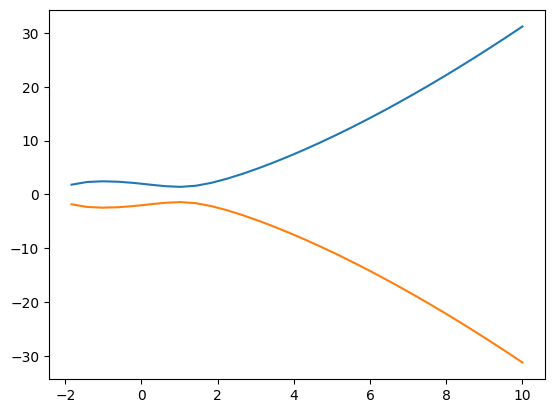

In [30]:
import numpy as np
import matplotlib.pylab as pl

def f(x):
    return x**3 -3*x + 4

xa = np.mgrid[-10:10:50j] # -10 ~ 10사이의 복소수 50개의 배열을 생성
y = list()
x = list()
for i in range(0, len(xa)):
    _x = xa.ravel()[i]    # 1차원배열로 변환후, 인덱스 순서대로 선택
    _y = f(_x)
    if _y > 0:
        y.append(np.sqrt(_y))
        x.append(_x)

pl.plot(x, y, "-")
pl.plot(x, [-yi for yi in y], "-")
pl.show()

In [31]:
import pycoin.ecdsa as ecdsa

e = ecdsa.ellipticcurve.CurveFp(29,-3,4)
print(e.p(), e.a(), e.b())

29 -3 4


In [32]:
print("should be True (on curve) -> ", e.contains_point(0,2))
print("should be True (on curve) -> ", e.contains_point(22,1))
print("Should be False (not on curve) -> ", e.contains_point(22,3))

should be True (on curve) ->  True
should be True (on curve) ->  True
Should be False (not on curve) ->  False


The generator point (0,2)
1 (0,2)
2 (6,17)
3 (22,1)
4 (23,3)
5 (2,8)
6 (7,6)
7 (17,9)
8 (21,3)
9 (13,25)
10 (3,15)
11 (19,22)
12 (14,26)
13 (28,8)
14 (8,17)
15 (15,17)
16 (15,12)
17 (8,12)
18 (28,21)
19 (14,3)
20 (19,7)
21 (3,14)
22 (13,4)
23 (21,26)
24 (17,20)
25 (7,23)
26 (2,21)
27 (23,26)
28 (22,28)
29 (6,12)
30 (0,27)


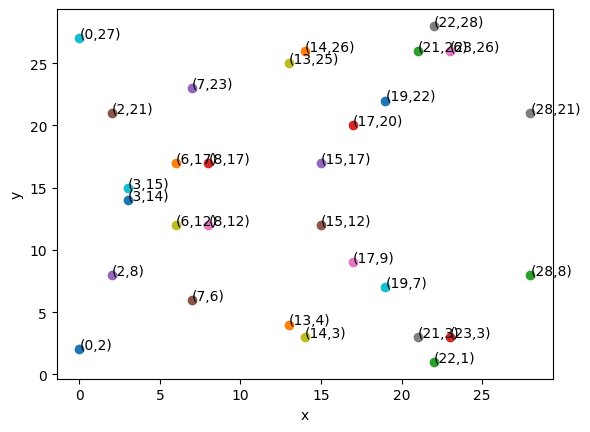

In [34]:
G=ecdsa.Point(e,0,2)
print("The generator point", G)
for k in range(1,31):
   print(k, str(k*G))
   P=k*G
   plt.scatter(P.x(),P.y())
   plt.text(P.x(),P.y(),str(P))

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [35]:
import secrets
import pycoin.ecdsa as ecdsa

privKey = secrets.randbelow(ecdsa.generator_secp256k1.order())
print(privKey)
print(hex(privKey))

pubKey = (ecdsa.generator_secp256k1 * privKey).pair()
print(pubKey)


4508332633520972401680970795483461372085408064557378648575352787964576829113
0x9f7a0375604a0ae7d12a7ddec6bbb075563d786850aebd4bd81b95dde3e8eb9
(92168875276011233774034116229820055716831085325678578550460741542679785230453, 103909432248661731144237467610673604223820020115816081937365085874404984459661)


In [37]:
import hashlib
import codecs

msg="let's meet in my office at 10 in the morning."
hashBytes = hashlib.sha3_256(msg.encode('utf-8')).digest()
msgHash = int.from_bytes(hashBytes, byteorder='big')
signature = ecdsa.sign(ecdsa.generator_secp256k1, privKey, msgHash)
print(signature)

valid = ecdsa.verify(ecdsa.generator_secp256k1, pubKey, msgHash, signature)
print(valid)

(114542256669791235823111643896087280159274177623775365517866072481535800773403, 62402385417270587435213183941407556356501953135810621667125516403285400628515)
True


In [75]:
%%writefile exercise1.js

console.log('blocknumber: ', eth.blockNumber);
console.log('enode: ', admin.nodeInfo['enode']);
console.log('peer: ',JSON.stringify(admin.peers));
console.log('account: ', eth.accounts);
console.log('balance: ', eth.getBalance(eth.accounts[0]), eth.getBalance(eth.accounts[1]));
console.log('before coinbase: ', eth.coinbase)
miner.setEtherbase(eth.accounts[1])
console.log('after coinbase: ', eth.coinbase)
console.log(JSON.stringify(txpool.inspect))
console.log('blocknumber: ', eth.blockNumber);

Overwriting exercise1.js


In [76]:
!geth --exec "loadScript('exercise1.js')" attach http://localhost:8445

blocknumber:  60
enode:  enode://bce3797998420c004b9cce8cf8fc5b68348f32a9c33ac30ae191144af885a55c6809c08332df0b0a214b1297b8c600292899a275e1ad036d74bd7d03a5d987df@121.128.117.17:38445
peer:  [{"enode":"enode://a72d06c3b92b20611baf66546ee5fffeb0a91d39cdd6dbc1749998045361f4c2d68ab9fce466972afb3e427c23c69b89778232e1b01030f9b60ab622f67ef449@79.127.216.33:30303?discport=30345","id":"0ec739d6d694c0bdea175e2e512d2530d23aa0ea878b67cc08ae5503753cceb6","name":"bor/v1.2.7/linux-amd64/go1.20.14","caps":["eth/66","eth/67","eth/68","snap/1"],"network":{"localAddress":"121.128.117.17:59288","remoteAddress":"79.127.216.33:30303","inbound":false,"trusted":false,"static":false},"protocols":{"eth":"handshake","snap":"handshake"}}]
account:  0xd888207069c6c7652768216b26db265b07641e74,0x63c7a0a688fe02db193e8eef0649c5919dcea6de
balance:  120000000000000000000 0
before coinbase:  0x63c7a0a688fe02db193e8eef0649c5919dcea6de
after coinbase:  0x63c7a0a688fe02db193e8eef0649c5919dcea6de
{"pending":{},"queued":{}}
b

In [95]:
import bitcoin, hashlib

privKey = bitcoin.sha256('hello key')
pubKey = bitcoin.privtopub(privKey)
addr = bitcoin.pubtoaddr(pubKey)

msg = "The Japanese acted without the consent of his Majesty the Emperor of Korea."
f_msg = "The Japanese acted with the consent of his Majesty the Emperor of Korea."

sha = hashlib.sha256(msg.encode('UTF-8'))
f_sha = hashlib.sha256(f_msg.encode('utf-8'))
print('hash: ', sha.hexdigest())
print('f_hash: ', f_sha.hexdigest())
print('same byte?: ', sha.digest_size==f_sha.digest_size)

sig = bitcoin.ecdsa_sign(msg, privKey)
print('signature: ', sig)
print('verified: ', bitcoin.ecdsa_verify(msg, sig, pubKey))
f_sig = bitcoin.ecdsa_sign(f_msg, privKey)
print('verified: ', bitcoin.ecdsa_verify(msg, f_sig, pubKey))

hash:  1bb1de8e7722d2d8af05c6356c9f6f0846e7bc68d4ab1de49e4ffa994308769e
f_hash:  bb2103f4a1230e5a1b198f845da9f32c7a82f8e730c88c220cebef677d7317a9
same byte?:  True
signature:  Gz7wmdHyXgNmnOOKaYU82P4xnLgfCd3AlZ14lkq8DiP5WhjtmFHppQD6kintizMXR7XvNr6VzUon0iOsJgiNjgk=
verified:  True
verified:  False


In [104]:
%%writefile mining.js
console.log(eth.coinbase);
console.log(eth.getBalance(eth.coinbase));
miner.start(1); admin.sleepBlocks(1); miner.stop()
console.log(eth.getBalance(eth.coinbase));

Overwriting mining.js


In [105]:
!geth --exec "loadScript('mining.js')" attach http://localhost:8445

0xd888207069c6c7652768216b26db265b07641e74
120000000000000000000
122000000000000000000
null


In [13]:
import hashlib

txA = "Hello"
txB = 'How are you?'
txC = 'This is Thursday'
txD = 'Happy new Year'

_hashA = hashlib.sha256(hashlib.sha256(txA.encode()).digest()).hexdigest()
_hashB = hashlib.sha256(hashlib.sha256(txB.encode()).digest()).hexdigest()

# print(_hashA)

hashAswap = "".join(reversed([_hashA[i:i+2] for i in range(0, hashlib.sha256(txA.encode()).digest_size * 2, 2)]))
hashBswap = "".join(reversed([_hashB[i:i+2] for i in range(0, hashlib.sha256(txB.encode()).digest_size * 2, 2)]))

print(hashAswap)
print(hashBswap)

1c86253061adcef153466e06b4770da683a590dbf895192db766aef5be18bc70
d0e7719d7633fb945d596090dfa31a95ae81b18d90352d63fc49af7f35ce2710


In [15]:
hashAB=hashAswap+hashBswap
_hashAB = hashlib.sha256(hashlib.sha256(hashAB.encode()).digest()).hexdigest()

"".join(reversed([_hashAB[i:i+2] for i in range(0, 32*2, 2)]))

'032916ba0fc9c63fc5440a3b20069370da1b5d3c605797b28ac1a5a5876dc7e0'

In [16]:
def doubleHashByteSwap(raw):
    import hashlib
    size = hashlib.sha256(raw.encode()).digest_size
    _hash = hashlib.sha256(hashlib.sha256(raw.encode()).digest()).hexdigest()
    hashSwap = "".join(reversed([_hash[i:i+2] for i in range(0, size, 2)]))
    return hashSwap

hA = doubleHashByteSwap(txA)
hB = doubleHashByteSwap(txB)
hAB = doubleHashByteSwap(hA + hB)

print("hashA: {0}\nhashB: {1}\nhashAB: {2}".format(hA, hB, hAB))

hashA: 83a590dbf895192db766aef5be18bc70
hashB: ae81b18d90352d63fc49af7f35ce2710
hashAB: 074fa582b6de5ba17faf8593a6f0520c


In [17]:
def mining(nzeros):
    import hashlib
    found=False
    blockNumber=54 # hex
    NONCE=0
    data='Hello'
    previousHash='5d7c7ba21cbbcd75d14800b100252d5b428e5b1213d27c385bc141ca6b47989e'
    while found==False:
        z=str(blockNumber)+str(NONCE)+data+previousHash
        guessHash=hashlib.sha256(z.encode('utf-8')).hexdigest()
        # e.g. nzeros=4 -> str(pow(10,nzeros))[1:nzeros+1] -> "0000"
        if guessHash[:nzeros]==str(pow(10,nzeros))[1:nzeros+1]:
            found=True
        NONCE+=1
        if(NONCE%pow(10,nzeros)==0):   #print guessHash every 10000000
            print("NONCE: ",NONCE, guessHash)
    print("Solved ", "NONCE: ", NONCE, "guessHash: ", guessHash)
    return guessHash

mining(4)

NONCE:  10000 e0458f4777612b5565be6df81b53f76943dac3f77939e886e0dc5a2fb5ad1855
NONCE:  20000 051a66b1b1f972abb6b1ce04574551d5fea86751e18b1588d556627f11c424da
NONCE:  30000 931475a41686265ee9f65ac07341ba85c021ca8c426990981bb582d2fbfb2299
NONCE:  40000 4310482b52d76dea37f4ad6910bfe2bc06b4a8b63ac005b9c784f868d0fe84f2
NONCE:  50000 8b810c0fe332eeb08db6c982170ce905567fe4a6b1a973b5b3f8db37cce0e415
NONCE:  60000 7b8d4b1341494a017bd61a42a13ab115b95977705e08e5879d8c4934045e62ca
NONCE:  70000 93033e94e4570eee1e720b475fec2756eaa564c0fc5beac5638a615ab46ede8c
NONCE:  80000 2026dca4bf2d9389adc13e50d73e4b2d0f01d41b8352530b37fbf5b5080300f8
NONCE:  90000 bc9c3c347d9fcff8723440a80815c1100fc3455554ed1dc21b78b06c226c5d64
Solved  NONCE:  94280 guessHash:  000043ce4a61d02bff0e68ba18a7daf448cb3b93691fdd4850f6cd3f85b7a13f


'000043ce4a61d02bff0e68ba18a7daf448cb3b93691fdd4850f6cd3f85b7a13f'

In [18]:
"0x19626c78e1038d70e1e7e928a2c60a50f59a85d427613c461775401636e81519" == "0x19626c78e1038d70e1e7e928a2c60a50f59a85d427613c461775401636e81519"

True

In [2]:
%%writefile _ganacheNow.bat
node_modules\.bin\ganache --host "127.0.0.1" --port "8345"

Overwriting _ganacheNow.bat


In [10]:
%%writefile src/web3ethCommands.js
var Web3=require('web3');
var web3= new Web3('http://localhost:8345');
web3.eth.getAccounts().then(console.log);
web3.eth.getCoinbase().then(console.log);
web3.eth.getBlockNumber().then(console.log);
web3.eth.getBalance('0x6dbfdc033024d0ADA004391A32F71F9134860eCD').then(console.log);
web3.eth.getNodeInfo().then(console.log);

Overwriting src/web3ethCommands.js


In [7]:
!geth --exec "loadScript('src/web3ethCommands.js')" attach http://localhost:8345

GoError: error while compiling or running script: TypeError: Object has no member 'sendAsync' at web3.js:6384:28(29)
	at github.com/ethereum/go-ethereum/internal/jsre.MakeCallback.func1 (native)
	at <eval>:1:1(1)



In [12]:
%%writefile src/web3accounts.js
var Web3 = require('web3');
var web3 = new Web3('http://localhost:8345');
web3.eth.getAccounts(function(err,res) {console.log('(1) accounts: ' + res);});
my = [];
web3.eth.getAccounts(function(err,res) {for (x in res) {my.push(res[x])}});
console.log('(2) accounts from array: ' + my[0]);

Overwriting src/web3accounts.js


In [68]:
!node src/web3accounts.js

(2) accounts from array: undefined
(1) accounts: 0x5E1Ed2f8f436c3250BF616706c2e541831b1ce5B,0x8Adae434F34308aC5200FFC1Acd89f12701caa52,0x8f191Ea924E90E10b55EBaBafaC1baf4738775c9,0x4A1A56D293BCf030c35A45cB983aF2945871c664,0x326DA9caB608602EFf3CaEE609879b403658bc30,0xEf4F08321fe56894e70ae07e53a84296075D2bA8,0xe753C92dd3c31B0fAd731c0576FFBc9Cf7957301,0x1e8BfAc5a8f7F4aD39dCD39E1B305E51e25E0A48,0x1370ac82109B85199E7Ea9E28D1BFfae7422D7fF,0x2c4d9d1D07648976BcC574300ae79EFD1025b552


In [13]:
%%writefile src/promiseThen.js
var doPromise = new Promise(function(myResolve, myReject) {
    myResolve(123);
});
doPromise.then(function(my){
        console.log("RETURNED: "+my);
    }).catch(function(err) {
        console.log("ERROR: "+err);
    });

Writing src/promiseThen.js


In [69]:
!node src/promiseThen.js

RETURNED: 123


In [16]:
%%writefile scripts/simpleCoinbase.html
<!doctype>
<html>
<head>
<script src="https://cdn.jsdelivr.net/npm/web3@1.2.5/dist/web3.min.js"></script>
<!-- script src="https://cdn.jsdelivr.net/npm/web3@0.20.5/dist/web3.min.js"></script -->
<script type="text/javascript">
    //var Web3 = require('web3');
    var web3 = new Web3(new Web3.providers.HttpProvider("http://localhost:8345"));

    function displayCoinbase() {
        var web3version = web3.version;  //web3.version.api
        //web3@0.20.x
        //document.getElementById('web3ver').innerText = 'web3 version 0.20.x: '+web3version.api;
        //document.getElementById('web3coinbase').innerText = 'coinbase: ' + web3.eth.coinbase;
        //web3@1.2.x
        document.getElementById('web3ver').innerText = 'web3 version: '+web3version;
        web3.eth.getCoinbase().then(function(coin) {
            document.getElementById('web3coinbase').innerText = 'coinbase: ' + coin;
            });
    }
</script>
</head>
<body>
    <h1>Hello</h1>
    <button type="button" onClick="displayCoinbase();">Display Coinbase</button>
    <div></div>
    <div id="web3ver"></div>
    <div id="web3coinbase"></div>
</body>
</html>

Writing scripts/simpleCoinbase.html


In [22]:
import hashlib

nonce = 1
txA = 'Hello'
txB = 'How are you?'
txC = 'This is Thursday'
txD = 'Happy new Year'

hashA = hashlib.sha256(hashlib.sha256(txA.encode()).digest()).hexdigest()
hashB = hashlib.sha256(hashlib.sha256(txB.encode()).digest()).hexdigest()
hashC = hashlib.sha256(hashlib.sha256(txC.encode()).digest()).hexdigest()
hashD = hashlib.sha256(hashlib.sha256(txD.encode()).digest()).hexdigest()

hashAswap = "".join(reversed([_hashA[i:i+2] for i in range(0, hashlib.sha256(txA.encode()).digest_size*2, 2)]))
hashBswap = "".join(reversed([_hashB[i:i+2] for i in range(0, hashlib.sha256(txB.encode()).digest_size*2, 2)]))
hashCswap = "".join(reversed([_hashC[i:i+2] for i in range(0, hashlib.sha256(txC.encode()).digest_size*2, 2)]))
hashDswap = "".join(reversed([_hashD[i:i+2] for i in range(0, hashlib.sha256(txD.encode()).digest_size*2, 2)]))

_hashAB = hashAswap+hashBswap
hashAB = hashlib.sha256(hashlib.sha256(_hashAB.encode()).digest()).hexdigest()
hashABswap = "".join(reversed([hashAB[i:i+2] for i in range(0, hashlib.sha256(hashAB.encode()).digest_size*2, 2)]))

_hashCD = hashCswap + hashDswap
hashCD = hashlib.sha256(hashlib.sha256(_hashCD.encode()).digest()).hexdigest()
hashCDswap = "".join(reversed([hashCD[i:i+2] for i in range(0, hashlib.sha256(hashCD.encode()).digest_size*2, 2)]))

print(hashABswap)
print(hashCDswap)

_hashABCD = hashABswap + hashCDswap
hashABCD = hashlib.sha256(hashlib.sha256(_hashABCD.encode()).digest()).hexdigest()
hashABCDswap = "".join(reversed([hashABCD[i:i+2] for i in range(0, hashlib.sha256(hashABCD.encode()).digest_size*2, 2)]))
print(hashABCDswap)


032916ba0fc9c63fc5440a3b20069370da1b5d3c605797b28ac1a5a5876dc7e0
f4a46fe8ab4ec747ff50409006c6d8a71bd9b7eeabf24d5bd93bd65da8b4d9de
840890abd2025d836dcf27a59f2a94304e8c16631a337b6402d3519c1d01e75e


In [23]:
!geth --exec eth.coinbase attach http://localhost:8445

"0xd888207069c6c7652768216b26db265b07641e74"


In [48]:
%%writefile src/e_testTran2.js
console.log('account0 balance: ', eth.getBalance(eth.coinbase));
console.log('account1 balance: ', eth.getBalance(eth.accounts[1]));
var ba1 = eth.getBalance(eth.accounts[1]);
console.log('block number:', eth.blockNumber);
var t = eth.sendTransaction({
    from: eth.coinbase,
    to: eth.accounts[1],
    value: 111});
console.log('gas price:', eth.gasPrice);
console.log('transactionHash:', t);
console.log('\n\n...mining start')
miner.start(1); admin.sleepBlocks(1); miner.stop();
console.log('mining done...\n')

console.log('account0 balance: ', eth.getBalance(eth.coinbase));
console.log('account1 balance: ', eth.getBalance(eth.accounts[1]));
var ba2 = eth.getBalance(eth.accounts[1]);
console.log('block number:', eth.blockNumber);

console.log('increased balance:', ba2-ba1);
console.log('gasUsed:', eth.getTransactionReceipt(t).gasUsed)

Overwriting src/e_testTran2.js


In [49]:
!geth --exec "loadScript('src/e_testTran2.js')" attach http://localhost:8445

account0 balance:  2.012889999999999979556e+21
account1 balance:  1110000000000020444
block number: 2479
gas price: 1000000000
transactionHash: 0x74f8d84c6bbb3cf462f35366720d828754a7fb548e1c4db647b6687ed724b36e


...mining start
mining done...

account0 balance:  2.014889999999999979445e+21
account1 balance:  1110000000000020555
block number: 2480
increased balance: 128
gasUsed: 21000
null


In [90]:
!geth --exec eth.coinbase attach http://localhost:8345

"0x8c75cf6212b515b33ba5bae2b9277c9f7633f690"


In [89]:
!geth --exec eth.coinbase attach http://localhost:8445

"0xd888207069c6c7652768216b26db265b07641e74"


In [157]:
%%writefile src/transToGanache.js
var Web3 = require('web3');
var web3 = new Web3('http://localhost:8345');
web3.eth.getBalance("0x8c75cf6212b515b33ba5bae2b9277c9f7633f690").then(console.log);
web3.eth.getBalance("0xd888207069c6c7652768216b26db265b07641e74").then(console.log);
web3.eth.sendTransaction({
    from: '0x8c75cf6212b515b33ba5bae2b9277c9f7633f690',
    to: '0xd888207069c6c7652768216b26db265b07641e74',
    value: web3.utils.toWei('1', 'ether')});


Overwriting src/transToGanache.js


In [158]:
!node src/transToGanache.js

997999965543659375000
2000000000000000000


In [159]:
%%writefile src/checkTrans.js
var Web3 = require('web3');
var web3 = new Web3('http://localhost:8345');
web3.eth.getBalance('0x8c75cf6212b515b33ba5bae2b9277c9f7633f690').then(console.log);
web3.eth.getBalance('0xd888207069c6c7652768216b26db265b07641e74').then(console.log);

Overwriting src/checkTrans.js


In [160]:
!node src/checkTrans.js

996999951469672084000
3000000000000000000


In [ ]:
//web3.eth.getAccounts().then(ac => {console.log(ac[0])});
async function getAccount0() {
    var accounts = await web3.eth.getAccounts();
    var account0 = accounts[0];
    console.log(account0);
}
getAccount0();

In [165]:
%%writefile src/getCBBalance.js
var Web3 = require('web3');
var web3 = new Web3('http://localhost:8345');

web3.eth.getBalance("0x8c75cf6212b515b33ba5bae2b9277c9f7633f690").then(web3.utils.fromWei).then(console.log);

Overwriting src/getCBBalance.js


In [166]:
!node src/getCBBalance.js

996.999951469672084


In [244]:
%%writefile src/getTransaction.js
var Web3 = require('web3');
var web3 = new Web3('http://localhost:8345');

async function printAccountInfo() {
    accounts = await web3.eth.getAccounts();
    console.log("account0:", accounts[0]);
    console.log("account0 balance:", await web3.eth.getBalance(accounts[0]));
    console.log("account1:", accounts[1]);
    console.log("account1 balance:", await web3.eth.getBalance(accounts[1]));
}

async function sendEther() {
    accounts = await web3.eth.getAccounts();

    tx = await web3.eth.sendTransaction({
        from: accounts[0],
        to: accounts[1],
        value: 111
    });

    console.log('transaction hash:', tx.transactionHash);
}

async function printGasInfo() {
    gasPrice = await web3.eth.getGasPrice();
    console.log('gas Price:', gasPrice);
}

async function printNonce() {
    accounts = await web3.eth.getAccounts();
    nonce = await web3.eth.getTransactionCount(accounts[0]);
    console.log('nonce:', nonce);
}

async function printBalanceChanges() {
    accounts = await web3.eth.getAccounts();

    balanceBefore0 = await web3.eth.getBalance(accounts[0]);
    balanceBefore1 = await web3.eth.getBalance(accounts[1]);
    
    await sendEther();

    balanceAfter0 = await web3.eth.getBalance(accounts[0]);
    balanceAfter1 = await web3.eth.getBalance(accounts[1]);

    console.log('account0 balance changes:', balanceBefore0 - balanceAfter0);
    console.log('account1 balance changes:', balanceAfter1 - balanceBefore1);
}

async function printTotalBalance() {
    accounts = await web3.eth.getAccounts();
    balance0 = await web3.eth.getBalance(accounts[0]);
    balance1 = await web3.eth.getBalance(accounts[1]);
    totalBalance = balance0 + balance1;
    console.log('total balance:', totalBalance);
}

(async () => {
    await printAccountInfo();
    await printGasInfo();
    await printNonce();
    await printBalanceChanges();
    await printTotalBalance();
})();

Overwriting src/getTransaction.js


In [245]:
!node src/getTransaction.js

account0: 0x8c75CF6212b515B33bA5Bae2B9277C9F7633f690
account0 balance: 996999856314237181225
account1: 0xB6bdc51fdcF11E0cBC825AF19a3F5fa85A6Bd1c8
account1 balance: 1000000000000000017664
gas Price: 2000000000
nonce: 28
transaction hash: 0xa92b35cad39aeebdbdb3204cf4ea7a102ace63571adec4e4c41dd064ed27f9a0
account0 balance changes: 439424909312
account1 balance changes: 0
total balance: 9969998558748122231141000000000000000017775


# 컨트랙 배포

In [134]:
%%writefile src/Hello.sol
// SPDX-License-Identifier: GPL-3.0
pragma solidity ^0.8.0;
contract Hello {
    function sayHello() pure public returns(string memory) {
        return "Hello World";
    }
}

Overwriting src/Hello.sol


In [135]:
!solc-windows.exe --abi --bin --gas src/Hello.sol


======= src/Hello.sol:Hello =======
Gas estimation:
construction:
   121 + 72000 = 72121
external:
   sayHello():	infinite
Binary:
608060405234801561000f575f80fd5b506101688061001d5f395ff3fe608060405234801561000f575f80fd5b5060043610610029575f3560e01c8063ef5fb05b1461002d575b5f80fd5b61003561004b565b6040516100429190610112565b60405180910390f35b60606040518060400160405280600b81526020017f48656c6c6f20576f726c64000000000000000000000000000000000000000000815250905090565b5f81519050919050565b5f82825260208201905092915050565b5f5b838110156100bf5780820151818401526020810190506100a4565b5f8484015250505050565b5f601f19601f8301169050919050565b5f6100e482610088565b6100ee8185610092565b93506100fe8185602086016100a2565b610107816100ca565b840191505092915050565b5f6020820190508181035f83015261012a81846100da565b90509291505056fea264697066735822122001a64d049d033122411d61d67ad7c64eed5d54263462304f34a2c6c36f6d337b64736f6c63430008180033
Contract JSON ABI
[{"inputs":[],"name":"sayHello","outputs":[{"internalType":"string","na

In [136]:
%%writefile src/getMyAddr.js
var Web3 = require('web3');
var web3 = new Web3('http://localhost:8345');
web3.eth.getAccounts().then(console.log);

Overwriting src/getMyAddr.js


In [137]:
!node src/getMyAddr.js

[
  '0x3aCcFf945E390127b9e324B68cA090b65a0E5Bd8',
  '0x00b64C72946a840325096472006666e3ddd0bDA8',
  '0x37c1e771D081e734B4372Ed873B19dCe8Acc63d2',
  '0x310275A539F57d28C480B911DE97B55d906BAe2C',
  '0x503890ef3f4349Ea5D0F2Bc18fE2F3b412bbd6b2',
  '0xED73Cd9165904C222f38Ea73f44BFa3E9EBC1261',
  '0x23B0A990e0197Bd12bf4220Bf57fee179bd32fbF',
  '0x3484827F5EfD594069d3D31c1b9dEEFC6BF85281',
  '0x1bd201cD0595D4022DAda493Cd7fACD2183e0eAb',
  '0x35F551441c58A09E850C450388B20cC009C5dB60'
]


In [143]:
%%writefile src/HelloDeployGas.js
var Web3 = require('web3');
var web3 = new Web3('http://localhost:8345');

var shelloContract = new web3.eth.Contract([{"inputs":[],"name":"sayHello","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"pure","type":"function"}]);

shelloContract.deploy({
    from: '0x3aCcFf945E390127b9e324B68cA090b65a0E5Bd8',
    data: '608060405234801561000f575f80fd5b506101688061001d5f395ff3fe608060405234801561000f575f80fd5b5060043610610029575f3560e01c8063ef5fb05b1461002d575b5f80fd5b61003561004b565b6040516100429190610112565b60405180910390f35b60606040518060400160405280600b81526020017f48656c6c6f20576f726c64000000000000000000000000000000000000000000815250905090565b5f81519050919050565b5f82825260208201905092915050565b5f5b838110156100bf5780820151818401526020810190506100a4565b5f8484015250505050565b5f601f19601f8301169050919050565b5f6100e482610088565b6100ee8185610092565b93506100fe8185602086016100a2565b610107816100ca565b840191505092915050565b5f6020820190508181035f83015261012a81846100da565b90509291505056fea264697066735822122001a64d049d033122411d61d67ad7c64eed5d54263462304f34a2c6c36f6d337b64736f6c63430008180033',
}).estimateGas().then(function(myGas) {
    console.log("Estimated gas: " + myGas);
    gas = myGas;
}).catch(console.error);

Overwriting src/HelloDeployGas.js


In [144]:
!node src/HelloDeployGas.js

Estimated gas: 130879


In [145]:
%%writefile src/HelloDeploy.js
var Web3 = require('web3');
var web3 = new Web3('http://localhost:8345');

var shelloContract = new web3.eth.Contract([{"inputs":[],"name":"sayHello","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"pure","type":"function"}]);

shelloContract.deploy({
    data: '608060405234801561000f575f80fd5b506101688061001d5f395ff3fe608060405234801561000f575f80fd5b5060043610610029575f3560e01c8063ef5fb05b1461002d575b5f80fd5b61003561004b565b6040516100429190610112565b60405180910390f35b60606040518060400160405280600b81526020017f48656c6c6f20576f726c64000000000000000000000000000000000000000000815250905090565b5f81519050919050565b5f82825260208201905092915050565b5f5b838110156100bf5780820151818401526020810190506100a4565b5f8484015250505050565b5f601f19601f8301169050919050565b5f6100e482610088565b6100ee8185610092565b93506100fe8185602086016100a2565b610107816100ca565b840191505092915050565b5f6020820190508181035f83015261012a81846100da565b90509291505056fea264697066735822122001a64d049d033122411d61d67ad7c64eed5d54263462304f34a2c6c36f6d337b64736f6c63430008180033'
}).send({
    from: '0x3aCcFf945E390127b9e324B68cA090b65a0E5Bd8',
    gas: '4700000'
}, function(error, transactionHash) {
    console.log(error, transactionHash);
}).then(function(newContractInstance) {
    console.log(newContractInstance.options.address);
});

Overwriting src/HelloDeploy.js


In [146]:
!node src/HelloDeploy.js

null 0x7e8e39d6da80c4b27d4ae7540fe3fe2b323bc28ccca93fe6bbc90924de4cbe5c
0x99a546c4D34153c12c41b75D194D7CF1d17d4046


In [147]:
%%writefile src/HelloDeploy2.js
var Web3 = require('web3');
var web3 = new Web3('http://localhost:8445');

var shelloContract = new web3.eth.Contract([{"constant":true, "inputs":[],"name":"sayHello","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"pure","type":"function"}]);

shelloContract.deploy({
    data: '608060405234801561000f575f80fd5b506101688061001d5f395ff3fe608060405234801561000f575f80fd5b5060043610610029575f3560e01c8063ef5fb05b1461002d575b5f80fd5b61003561004b565b6040516100429190610112565b60405180910390f35b60606040518060400160405280600b81526020017f48656c6c6f20576f726c64000000000000000000000000000000000000000000815250905090565b5f81519050919050565b5f82825260208201905092915050565b5f5b838110156100bf5780820151818401526020810190506100a4565b5f8484015250505050565b5f601f19601f8301169050919050565b5f6100e482610088565b6100ee8185610092565b93506100fe8185602086016100a2565b610107816100ca565b840191505092915050565b5f6020820190508181035f83015261012a81846100da565b90509291505056fea264697066735822122001a64d049d033122411d61d67ad7c64eed5d54263462304f34a2c6c36f6d337b64736f6c63430008180033'
}).send({
    from: '0x3aCcFf945E390127b9e324B68cA090b65a0E5Bd8',
    gas: '600000'
}, function (error, transactionHash) {
    console.log(error, transactionHash);
}).on('receipt', function(receipt) {
    console.log('receipt: ' + receipt.contractAddress);
}).then(function(newContractInstance) {
    console.log('address:' + newContractInstance.options.address);
});

Overwriting src/HelloDeploy2.js


In [148]:
!node src/HelloDeploy2.js

Error: Returned error: unknown account
    at Object.ErrorResponse (C:\Users\CHOYS\Code\202010818\node_modules\web3-core-helpers\lib\errors.js:28:19)
    at C:\Users\CHOYS\Code\202010818\node_modules\web3-core-requestmanager\lib\index.js:300:36
    at C:\Users\CHOYS\Code\202010818\node_modules\web3-providers-http\lib\index.js:131:13
    at process.processTicksAndRejections (node:internal/process/task_queues:95:5) {
  data: null
} undefined


node:internal/process/promises:289
            triggerUncaughtException(err, true /* fromPromise */);
            ^

Error: Returned error: unknown account
    at Object.ErrorResponse (C:\Users\CHOYS\Code\202010818\node_modules\web3-core-helpers\lib\errors.js:28:19)
    at C:\Users\CHOYS\Code\202010818\node_modules\web3-core-requestmanager\lib\index.js:300:36
    at C:\Users\CHOYS\Code\202010818\node_modules\web3-providers-http\lib\index.js:131:13
    at process.processTicksAndRejections (node:internal/process/task_queues:95:5) {
  data: null
}

Node.js v20.12.2


In [151]:
%%writefile src/HelloUse.js
var Web3 = require('web3');
var web3 = new Web3('http://localhost:8345');
var shelloContract = new web3.eth.Contract([{"inputs":[],"name":"sayHello","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"pure","type":"function"}], '0x99a546c4D34153c12c41b75D194D7CF1d17d4046');

shelloContract.methods.sayHello().call().then(function (str) { console.log(str);});

Overwriting src/HelloUse.js


In [152]:
!node src/HelloUse.js

Hello World


In [19]:
%%writefile scripts/hello.html
<!doctype>
<html>
<head>
<script src="https://cdn.jsdelivr.net/npm/web3@1.2.5/dist/web3.min.js"></script>
<!-- script src="https://cdn.jsdelivr.net/npm/web3@0.20.5/dist/web3.min.js"></script -->
<script type="text/javascript">
    var web3 = new Web3(new Web3.providers.HttpProvider("http://localhost:8345"));

    function displayHello() {
        var web3version = web3.version;  //web3.version.api

        var shelloContract = new web3.eth.Contract([{"inputs":[],"name":"sayHello","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"pure","type":"function"}], '0xB6D1062172A9675Cc3DFc140323B8b99D02a25F7');
        shelloContract.methods.sayHello().call().then(function(str) {
            document.getElementById('sayhello').innerText = "The message from blockchain: " + str;
        });
        document.getElementById('web3ver').innerText = '*web3 version: '+web3version;
        web3.eth.getCoinbase().then(function(coin) {
            document.getElementById('web3coinbase').innerText = 'coinbase: ' + coin;
            });
    }
</script>
</head>
<body>
    <h1>Hello</h1>
    <button type="button" onClick="displayHello();">Display Hello</button>
    <div></div>
    <div id="sayhello"></div>
    <div id="web3ver"></div>
    <div id="web3coinbase"></div>
</body>
</html>

Writing scripts/hello.html


In [12]:
%%writefile src/Greeter.sol
// SPDX-License-Identifier: GPL-3.0

pragma solidity ^0.8.0;

contract Greeter {
    string greeting;

    constructor() {
        greeting = 'Hello';
    }

    function setGreeting(string memory _greeting) public {
        greeting = _greeting;
    }

    function greet() view public returns (string memory) {
        return greeting;
    }
}

Overwriting src/Greeter.sol


In [13]:
!solc-windows.exe --abi --bin --gas src/Greeter.sol


======= src/Greeter.sol:Greeter =======
Gas estimation:
construction:
   infinite + 321800 = infinite
external:
   greet():	infinite
   setGreeting(string):	infinite
Binary:
608060405234801562000010575f80fd5b506040518060400160405280600581526020017f48656c6c6f0000000000000000000000000000000000000000000000000000008152505f9081620000569190620002c1565b50620003a5565b5f81519050919050565b7f4e487b71000000000000000000000000000000000000000000000000000000005f52604160045260245ffd5b7f4e487b71000000000000000000000000000000000000000000000000000000005f52602260045260245ffd5b5f6002820490506001821680620000d957607f821691505b602082108103620000ef57620000ee62000094565b5b50919050565b5f819050815f5260205f209050919050565b5f6020601f8301049050919050565b5f82821b905092915050565b5f60088302620001537fffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff8262000116565b6200015f868362000116565b95508019841693508086168417925050509392505050565b5f819050919050565b5f819050919050565b5f620001a9620001a36200019d84620001775

In [8]:
%%writefile src/greeterDeploy.js
var Web3 = require('web3');
var web3 = new Web3('http://localhost:8345');

var _abiArray = [{"inputs":[],"stateMutability":"nonpayable","type":"constructor"},{"inputs":[],"name":"greet","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"string","name":"_greeting","type":"string"}],"name":"setGreeting","outputs":[],"stateMutability":"nonpayable","type":"function"}];
var _bin = '608060405234801562000010575f80fd5b506040518060400160405280600581526020017f48656c6c6f0000000000000000000000000000000000000000000000000000008152505f9081620000569190620002c1565b50620003a5565b5f81519050919050565b7f4e487b71000000000000000000000000000000000000000000000000000000005f52604160045260245ffd5b7f4e487b71000000000000000000000000000000000000000000000000000000005f52602260045260245ffd5b5f6002820490506001821680620000d957607f821691505b602082108103620000ef57620000ee62000094565b5b50919050565b5f819050815f5260205f209050919050565b5f6020601f8301049050919050565b5f82821b905092915050565b5f60088302620001537fffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff8262000116565b6200015f868362000116565b95508019841693508086168417925050509392505050565b5f819050919050565b5f819050919050565b5f620001a9620001a36200019d8462000177565b62000180565b62000177565b9050919050565b5f819050919050565b620001c48362000189565b620001dc620001d382620001b0565b84845462000122565b825550505050565b5f90565b620001f2620001e4565b620001ff818484620001b9565b505050565b5b8181101562000226576200021a5f82620001e8565b60018101905062000205565b5050565b601f82111562000275576200023f81620000f5565b6200024a8462000107565b810160208510156200025a578190505b62000272620002698562000107565b83018262000204565b50505b505050565b5f82821c905092915050565b5f620002975f19846008026200027a565b1980831691505092915050565b5f620002b1838362000286565b9150826002028217905092915050565b620002cc826200005d565b67ffffffffffffffff811115620002e857620002e762000067565b5b620002f48254620000c1565b620003018282856200022a565b5f60209050601f83116001811462000337575f841562000322578287015190505b6200032e8582620002a4565b8655506200039d565b601f1984166200034786620000f5565b5f5b82811015620003705784890151825560018201915060208501945060208101905062000349565b868310156200039057848901516200038c601f89168262000286565b8355505b6001600288020188555050505b505050505050565b61064980620003b35f395ff3fe608060405234801561000f575f80fd5b5060043610610034575f3560e01c8063a413686214610038578063cfae321714610054575b5f80fd5b610052600480360381019061004d9190610260565b610072565b005b61005c610084565b6040516100699190610321565b60405180910390f35b805f90816100809190610544565b5050565b60605f80546100929061036e565b80601f01602080910402602001604051908101604052809291908181526020018280546100be9061036e565b80156101095780601f106100e057610100808354040283529160200191610109565b820191905f5260205f20905b8154815290600101906020018083116100ec57829003601f168201915b5050505050905090565b5f604051905090565b5f80fd5b5f80fd5b5f80fd5b5f80fd5b5f601f19601f8301169050919050565b7f4e487b71000000000000000000000000000000000000000000000000000000005f52604160045260245ffd5b6101728261012c565b810181811067ffffffffffffffff821117156101915761019061013c565b5b80604052505050565b5f6101a3610113565b90506101af8282610169565b919050565b5f67ffffffffffffffff8211156101ce576101cd61013c565b5b6101d78261012c565b9050602081019050919050565b828183375f83830152505050565b5f6102046101ff846101b4565b61019a565b9050828152602081018484840111156102205761021f610128565b5b61022b8482856101e4565b509392505050565b5f82601f83011261024757610246610124565b5b81356102578482602086016101f2565b91505092915050565b5f602082840312156102755761027461011c565b5b5f82013567ffffffffffffffff81111561029257610291610120565b5b61029e84828501610233565b91505092915050565b5f81519050919050565b5f82825260208201905092915050565b5f5b838110156102de5780820151818401526020810190506102c3565b5f8484015250505050565b5f6102f3826102a7565b6102fd81856102b1565b935061030d8185602086016102c1565b6103168161012c565b840191505092915050565b5f6020820190508181035f83015261033981846102e9565b905092915050565b7f4e487b71000000000000000000000000000000000000000000000000000000005f52602260045260245ffd5b5f600282049050600182168061038557607f821691505b60208210810361039857610397610341565b5b50919050565b5f819050815f5260205f209050919050565b5f6020601f8301049050919050565b5f82821b905092915050565b5f600883026103fa7fffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff826103bf565b61040486836103bf565b95508019841693508086168417925050509392505050565b5f819050919050565b5f819050919050565b5f61044861044361043e8461041c565b610425565b61041c565b9050919050565b5f819050919050565b6104618361042e565b61047561046d8261044f565b8484546103cb565b825550505050565b5f90565b61048961047d565b610494818484610458565b505050565b5b818110156104b7576104ac5f82610481565b60018101905061049a565b5050565b601f8211156104fc576104cd8161039e565b6104d6846103b0565b810160208510156104e5578190505b6104f96104f1856103b0565b830182610499565b50505b505050565b5f82821c905092915050565b5f61051c5f1984600802610501565b1980831691505092915050565b5f610534838361050d565b9150826002028217905092915050565b61054d826102a7565b67ffffffffffffffff8111156105665761056561013c565b5b610570825461036e565b61057b8282856104bb565b5f60209050601f8311600181146105ac575f841561059a578287015190505b6105a48582610529565b86555061060b565b601f1984166105ba8661039e565b5f5b828110156105e1578489015182556001820191506020850194506020810190506105bc565b868310156105fe57848901516105fa601f89168261050d565b8355505b6001600288020188555050505b50505050505056fea26469706673582212200d385b2255eeef28a84893b6d7b1732eda9b8a2434877b48995e2c5ddc8b719464736f6c63430008180033';
var _contract = new web3.eth.Contract(_abiArray);

_contract
    .deploy({data: '0x'+_bin})
    .send({from: '0xb33ba1622c164Cd85baA770De1a51b6d3DC5f0FC',
           gas: '494750',
           //gasPrice: '1000000000'
          })
    .then(function(newContractInstance) {
        console.log(newContractInstance.options.address);
    });

Overwriting src/greeterDeploy.js


In [9]:
!node src/greeterDeploy.js

0x1Cfc7AA0a01fF625472C77B454f01AB2C183fEac


In [12]:
%%writefile src/greeterUse.js
var Web3 = require('web3');
var web3 = new Web3('http://localhost:8345');

var _abiArray = [{"inputs":[],"stateMutability":"nonpayable","type":"constructor"},{"inputs":[],"name":"greet","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"string","name":"_greeting","type":"string"}],"name":"setGreeting","outputs":[],"stateMutability":"nonpayable","type":"function"}];
var greeter = new web3.eth.Contract(_abiArray, "0x1Cfc7AA0a01fF625472C77B454f01AB2C183fEac");

greeter.methods.greet().call().then(function(value) {console.log(value);});
greeter.methods.setGreeting("Hello SMU").send({from:"0xb33ba1622c164Cd85baA770De1a51b6d3DC5f0FC",gas:100000});
greeter.methods.greet().call().then(function(value) {console.log(value);});



Overwriting src/greeterUse.js


In [13]:
!node src/greeterUse.js

Hello
Hello


In [14]:
%%writefile src/Counter.sol
// SPDX-License-Identifier: GPL-3.0
pragma solidity ^0.8.0;
contract Counter {
    uint256 counter = 0;
    function add() public {
        counter++;
    }
    function subtract() public {
        counter--;
    }
    function getCounter() public view returns (uint256) {
        return counter;
    }
}

Overwriting src/Counter.sol


In [15]:
!solc-windows.exe --abi --bin --gas src/Counter.sol


======= src/Counter.sol:Counter =======
Gas estimation:
construction:
   5138 + 86200 = 91338
external:
   add():	24475
   getCounter():	2454
   subtract():	24496
Binary:
60806040525f8055348015610012575f80fd5b506101af806100205f395ff3fe608060405234801561000f575f80fd5b506004361061003f575f3560e01c80634f2be91f146100435780636deebae31461004d5780638ada066e14610057575b5f80fd5b61004b610075565b005b61005561008d565b005b61005f6100a5565b60405161006c91906100c5565b60405180910390f35b5f808154809291906100869061010b565b9190505550565b5f8081548092919061009e90610152565b9190505550565b5f8054905090565b5f819050919050565b6100bf816100ad565b82525050565b5f6020820190506100d85f8301846100b6565b92915050565b7f4e487b71000000000000000000000000000000000000000000000000000000005f52601160045260245ffd5b5f610115826100ad565b91507fffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff8203610147576101466100de565b5b600182019050919050565b5f61015c826100ad565b91505f820361016e5761016d6100de565b5b60018203905091905056fea2646970

In [16]:
%%writefile src/counterDeploy.js
var Web3=require('web3');
var web3=new Web3('http://localhost:8345');

var _abi = [{"inputs":[],"name":"add","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"getCounter","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"subtract","outputs":[],"stateMutability":"nonpayable","type":"function"}];
var _bin = '60806040525f8055348015610012575f80fd5b506101af806100205f395ff3fe608060405234801561000f575f80fd5b506004361061003f575f3560e01c80634f2be91f146100435780636deebae31461004d5780638ada066e14610057575b5f80fd5b61004b610075565b005b61005561008d565b005b61005f6100a5565b60405161006c91906100c5565b60405180910390f35b5f808154809291906100869061010b565b9190505550565b5f8081548092919061009e90610152565b9190505550565b5f8054905090565b5f819050919050565b6100bf816100ad565b82525050565b5f6020820190506100d85f8301846100b6565b92915050565b7f4e487b71000000000000000000000000000000000000000000000000000000005f52601160045260245ffd5b5f610115826100ad565b91507fffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff8203610147576101466100de565b5b600182019050919050565b5f61015c826100ad565b91505f820361016e5761016d6100de565b5b60018203905091905056fea2646970667358221220b5664e8d3d6cae2e97d9e492d6b940b71544fc960557b6a45f850f7143b0cd2164736f6c63430008180033';

var _contract = new web3.eth.Contract(_abi);
_contract
    .deploy({data: '0x'+_bin})
    .send({from: '0xb33ba1622c164Cd85baA770De1a51b6d3DC5f0FC', gas: 364124, gasPrice:'1000000000'})
    .then(function(newContractInstance) {
        console.log(newContractInstance.options.address)
    });

Overwriting src/counterDeploy.js


In [17]:
!node src/counterDeploy.js

0xe13374D806DDb4A412800512c67402002f02C470


In [20]:
%%writefile src/counterUse.js
var Web3=require('web3');
var web3=new Web3('http://localhost:8345');

var abi = [{"inputs":[],"name":"add","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"getCounter","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"subtract","outputs":[],"stateMutability":"nonpayable","type":"function"}];
var addr = '0xe13374D806DDb4A412800512c67402002f02C470';
var counter = new web3.eth.Contract(abi, addr);

counter.methods.getCounter().call().then(function(str) {console.log(str)});
counter.methods.add().send({from: '0xb33ba1622c164Cd85baA770De1a51b6d3DC5f0FC', gas:100000});
counter.methods.add().send({from: '0xb33ba1622c164Cd85baA770De1a51b6d3DC5f0FC', gas:100000});
counter.methods.getCounter().call().then(function(str) {console.log(str)});

Overwriting src/counterUse.js


In [21]:
!node src/counterUse.js

2
2


In [1]:
%%writefile src/Timer.sol
// SPDX-License-Identifier: GPL-3.0
pragma solidity ^0.8.0;
contract Timer {
    uint256 startTime;
    function start() public {
        startTime = block.timestamp;
    }
    function timePassed() public view returns(uint256) {
        return block.timestamp - startTime;
    }
    function getNow() view public returns(uint) {
        return block.timestamp;
    }
}

Overwriting src/Timer.sol


In [2]:
!solc-windows.exe --optimize --combined-json abi,bin src/Timer.sol > src/Timer.json

In [3]:
!type src\Timer.json

{"contracts":{"src/Timer.sol:Timer":{"abi":[{"inputs":[],"name":"getNow","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"start","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"timePassed","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"}],"bin":"608060405234801561000f575f80fd5b5060ce8061001c5f395ff3fe6080604052348015600e575f80fd5b5060043610603a575f3560e01c8063b445425314603e578063bbe4fd50146056578063be9a655514605b575b5f80fd5b60446064565b60405190815260200160405180910390f35b426044565b6062425f55565b005b5f8054606f90426074565b905090565b81810381811115609257634e487b7160e01b5f52601160045260245ffd5b9291505056fea264697066735822122055b839ba3b522956e2c5b986488b2916650d1b342c2e4e82310fa001a8ff6e1c64736f6c63430008180033"}},"version":"0.8.24+commit.e11b9ed9.Windows.msvc"}


In [4]:
%%writefile src/TimerImportTest.js
const _abiBinJson = require('./Timer.json');
contractName = Object.keys(_abiBinJson.contracts);

console.log('- contract name: ', contractName);
_abi = _abiBinJson.contracts[contractName].abi;
_abiArray = JSON.parse(JSON.stringify(_abi));
_bin = _abiBinJson.contracts[contractName].bin;

console.log("- ABI: ", _abi);
console.log("- ABIArray: ", _abiArray);
console.log("- Bytecode: ", _bin);

Overwriting src/TimerImportTest.js


In [5]:
!node src/TimerImportTest.js

- contract name:  [ 'src/Timer.sol:Timer' ]
- ABI:  [
  {
    inputs: [],
    name: 'getNow',
    outputs: [ [Object] ],
    stateMutability: 'view',
    type: 'function'
  },
  {
    inputs: [],
    name: 'start',
    outputs: [],
    stateMutability: 'nonpayable',
    type: 'function'
  },
  {
    inputs: [],
    name: 'timePassed',
    outputs: [ [Object] ],
    stateMutability: 'view',
    type: 'function'
  }
]
- ABIArray:  [
  {
    inputs: [],
    name: 'getNow',
    outputs: [ [Object] ],
    stateMutability: 'view',
    type: 'function'
  },
  {
    inputs: [],
    name: 'start',
    outputs: [],
    stateMutability: 'nonpayable',
    type: 'function'
  },
  {
    inputs: [],
    name: 'timePassed',
    outputs: [ [Object] ],
    stateMutability: 'view',
    type: 'function'
  }
]
- Bytecode:  608060405234801561000f575f80fd5b5060ce8061001c5f395ff3fe6080604052348015600e575f80fd5b5060043610603a575f3560e01c8063b445425314603e578063bbe4fd50146056578063be9a655514605b575b5f80fd5b6044

In [6]:
%%writefile src/TimerDeployAbiBinFromFile.js
var Web3 = require('web3');
var web3 = new Web3('http://localhost:8345');

_abiBinJson = require('./Timer.json');
contractName = Object.keys(_abiBinJson.contracts);
_abi = _abiBinJson.contracts[contractName].abi;
_bin = _abiBinJson.contracts[contractName].bin;

console.log("- ABI: " + _abi);
console.log("- Bytecode: " + _bin);

async function deploy() {
    const accounts = await web3.eth.getAccounts();
    console.log("\nDeploying the contract from " + accounts[0]);
    var deployed = await new web3.eth.Contract(_abi)
        .deploy({data: '0x'+_bin})
        .send({from: accounts[0], gas: 364124}, function(err, transactionHash) {
            if(!err) console.log('\nhash: ' + transactionHash);
        })
        .then(function(newContractInstance) {
            console.log("---> The contract deployed to: " + newContractInstance.options.address);
        })
}

deploy()

Overwriting src/TimerDeployAbiBinFromFile.js


In [7]:
!node src/TimerDeployAbiBinFromFile.js

- ABI: [object Object],[object Object],[object Object]
- Bytecode: 608060405234801561000f575f80fd5b5060ce8061001c5f395ff3fe6080604052348015600e575f80fd5b5060043610603a575f3560e01c8063b445425314603e578063bbe4fd50146056578063be9a655514605b575b5f80fd5b60446064565b60405190815260200160405180910390f35b426044565b6062425f55565b005b5f8054606f90426074565b905090565b81810381811115609257634e487b7160e01b5f52601160045260245ffd5b9291505056fea264697066735822122055b839ba3b522956e2c5b986488b2916650d1b342c2e4e82310fa001a8ff6e1c64736f6c63430008180033

Deploying the contract from 0xeB50ba7f372633028E3A28c838DdE992A17C61b6

hash: 0xaf3679d0d8d9108054ae0ff4bf3f823c0e68ab74bc936c8587f8cf85258b32be
---> The contract deployed to: 0x5fB1b59320163A62015f1A9B8B326Cd406c2E43A


In [16]:
%%writefile src/TimerUse.js
var Web3 = require('web3');
var web3 = new Web3('http://localhost:8345');

var _abiBinJson = require('./Timer.json');
contractName = Object.keys(_abiBinJson.contracts);
abi = _abiBinJson.contracts[contractName].abi;
addr = '0x5fB1b59320163A62015f1A9B8B326Cd406c2E43A'

var timer = new web3.eth.Contract(abi, addr);

async function doIt() {
    const accounts = await web3.eth.getAccounts();
    console.log("Call from: " + accounts[0]);
    await timer.methods.getNow().call().then(function(str) {console.log("Now: ", str)});
    await timer.methods.start().send({from: accounts[0], gas:100000});
    await 4000;
    await timer.methods.timePassed().call().then(function(str) {console.log("Passed: ", str)});
}

doIt();

Overwriting src/TimerUse.js


In [17]:
!node src/TimerUse.js

Call from: 0xeB50ba7f372633028E3A28c838DdE992A17C61b6
Now:  1716444210
Passed:  0


In [19]:
%%writefile src/IntBool.sol
//SPDX-License-Identifier: GPL-3.0-or-later
pragma solidity ^0.8.0;

contract IntBoolTest {
    bool married = true;
    uint256 xAge = 22;
    uint256 yAge = 25;
    //fixed phi; // = 3.14; // 선언만 가능
    function update() public {
        xAge = yAge;
        yAge = 33;
    }
    function setXAge(int age) public {
        xAge = uint(age);  //type conversion
    }
    function getXAge() public view returns(uint) {
        return xAge;
    }
    function getYAge() public view returns(uint) {
        return yAge;
    }
    function testInt() public view returns(bool) {
        assert(xAge>=20 && yAge>=20);
        return true;
    }
    function isMarried() public view returns(bool) {
        return married;
    }
}

Overwriting src/IntBool.sol


In [20]:
!solc-windows.exe src/IntBool.sol

Compiler run successful. No output generated.


In [31]:
%%writefile src/ByteStringTest.sol
//SPDX-License-Identifier: GPL-3.0-or-later
pragma solidity ^0.8.0;

contract ByteStringTest {
    bytes1 b1 = 0xFF;
    bytes2 b2 = 0xFFAA;
    bytes8 place8 = "7 hongji";
    bytes23 place23 = "7 hongji-dong jongro-gu";
    bytes place = "7 hongji-dong jongro-gu Seoul"; // 가변길이
    bytes myBytes = new bytes(3); // 0x000000
    string constant name = "jsl"; // utf-8 문자열
    function getB1() public view returns(bytes1) {
        return b1;
    }
    function getB2() public view returns(bytes2) {
        return b2;
    }
    function getB23() public view returns(bytes23) {
        return place23;
    }
    function getBytes() public view returns(bytes memory) {
        return myBytes;
    }
    function getLengOfBytes23() public view returns(uint) {
        return place23.length;
    }
    function getLenOfBytes() pure public returns(uint) {
        bytes memory bm = "7 hongji-dong jongro-gu";
        return bm.length;
    }
    function setB2(bytes2 _b2) public {
        b2 = _b2;
    }
    function setBytes() public{
        myBytes = "smu";
    }
    function getLenOfString() pure public returns(uint) {
        string memory nameLocal = "jslLocal";
        return bytes(nameLocal).length;
    }
    function getString() pure public returns(string memory) {
        string memory s = "\xec\x95\x88\xeb\x85\x95";
        return s;
    }
}

Overwriting src/ByteStringTest.sol


In [32]:
!solc-windows.exe src/ByteStringTest.sol

Compiler run successful. No output generated.


In [5]:
%%writefile src/StructTest.sol
//SPDX-License-Identifier: GPL-3.0-or-later
pragma solidity ^0.8.0;

contract StructTest {
    struct Student {
        uint num;
        string name;
        bool isEnrolled;
    }
    Student s1 = Student(202010818, "yscho", true);
    Student s2;

    function setStudent2(uint n, string memory sn, bool e) public {
        s2.num = n;
        s2.name = sn;
        s2.isEnrolled = e;
    }
    function getStudent1() public view returns(uint, string memory, bool) {
        return (s1.num, s1.name, s1.isEnrolled);
    }
    function getStudent2() public view returns(uint, string memory, bool) {
        return (s2.num, s2.name, s2.isEnrolled);
    }
    function getStudentName() pure public returns(string memory) {
        Student memory s3 = Student(201911112, "jsl3", true);
        return s3.name;
    }
}

Overwriting src/StructTest.sol


In [6]:
!solc-windows.exe src/StructTest.sol

Compiler run successful. No output generated.


In [7]:
%%writefile src/EnumTest.sol
//SPDX-License-Identifier: GPL-3.0-or-later
pragma solidity ^0.8.0;

contract EnumTest {
    enum Day {MONDAY,TUESDAY,WEDNESDAY,THURSDAY,FRIDAY,SATURDAY,SUNDAY}
    Day myDay = Day.FRIDAY;

    function getMyDay() public view returns(Day) {
        return myDay;
    }
    function setMyDay(Day d) public {
        myDay = d;
    }
    function setMyDayInt(uint d) public {
        myDay = Day(d);
    }
}

Overwriting src/EnumTest.sol


In [8]:
!solc-windows.exe src/EnumTest.sol

Compiler run successful. No output generated.


In [15]:
%%writefile src/ArrayTest.sol
//SPDX-License-Identifier: GPL-3.0-or-later
pragma solidity ^0.8.0;

contract ArrayTest {
    uint[3] ages = [15, 25, 35]; //고정배열
    int[] marks; //동적배열

    function updateAges(uint index, uint val) public {
        if (index >= 0 && index <= 2)
            ages[index] = val;
    }
    function initMarks() public {
        marks = new int[](5); // 5개의 요소 생성, 기본 값은 0으로 설정
    }
    function appendMark(int mark) public {
        marks.push(mark);
    }
    function popMark() public {
        marks.pop();
    }
    function getMarks() public view returns(int[] memory) {
        return marks;
    }
    function getAges() public view returns(uint[3] memory) {
        return ages;
    }
    function getLenOfArr() pure public returns(uint) {
        uint8[3] memory arr = [0, 1, 2];
        return arr.length;
    }
        
}

Overwriting src/ArrayTest.sol


In [16]:
!solc-windows.exe src/ArrayTest.sol

Compiler run successful. No output generated.


In [17]:
%%writefile src/AddressTest.sol
//SPDX-License-Identifier: GPL-3.0-or-later
pragma solidity ^0.8.0;

contract AddressTest {
    address owner;
    address payable receiver; // 수신 계정
    uint balanceOfOwner;

    constructor() {
        owner = msg.sender;
        balanceOfOwner = owner.balance; // 잔고 설정
    }
    function deposit() payable public {
        // payable로 선언하여, 코드가 없어도 입금이 된다.
    }
    function setReceiver(address payable addr) public {
        receiver = addr;
    }
    function getReceiver() public view returns(address) {
        return receiver;
    }
    function getBalanceOfThis() public view returns(uint) {
        return address(this).balance; // 컨트랙 자체의 잔고
    }
    function getBalanceOfOwner() public view returns(uint) {
        return owner.balance;
    }
    function getBalanceOfReceiver() public view returns(uint) {
        return receiver.balance;
    }
    function send() public payable {
        require(receiver.send(111)); // 111 wei를 receiver로 송금. require()로 예외처리
    }
    function transfer() public payable {
        receiver.transfer(11111);
    }
    function callValue() public payable {
        (bool success, ) = receiver.call{value: 11111}(""); // gas를 적어주지 않으면 실제 사용량 지급
        require(success, "transfer call failed.");
        (success, ) = receiver.call{gas: 10, value: 11111}(""); //gas를 적게 설정하고 테스트
        require(success, "transfer call failed with gas 10.");
    }
}

Overwriting src/AddressTest.sol


In [18]:
!solc-windows.exe src/AddressTest.sol

Compiler run successful. No output generated.


In [19]:
%%writefile src/AbiTest.sol
//SPDX-License-Identifier: GPL-3.0-or-later
pragma solidity ^0.8.0;

contract AbiTest {
    function encodeUint(uint256 _uint) public pure returns(bytes memory) {
        return abi.encode(_uint);
    }
    function encodeAddress(address addr) public pure returns(bytes memory) {
        return abi.encode(addr);
    }
    function encodeString(string memory s) public pure returns(bytes memory) {
        return abi.encode(s);
    }
    function encodePackedString(string memory s) public pure returns(bytes memory) {
        return abi.encodePacked(s);
    }
    function encodePackedStringConcat(string memory s1, string memory s2) public pure returns(bytes memory) {
        return abi.encodePacked(string.concat(s1,s2));
    }
    function encodeBytes(bytes memory b) public pure returns(bytes memory) {
        return abi.encode(b);
    }
    function encodePackedBytes(bytes memory b) public pure returns(bytes memory) {
        return abi.encodePacked(b);
    }
    function encodePackedBytes2String(bytes  memory b)  public  pure  returns(string  memory)  {
		return  string(abi.encodePacked(b));
	}
}

Writing src/AbiTest.sol


In [20]:
!solc-windows.exe src/AbiTest.sol

Compiler run successful. No output generated.


In [15]:
%%writefile src/MyBank.sol
//SPDX-License-Identifier:GPL-3.0-or-later
pragma solidity ^0.8.0;

contract MyBank {
    address owner;
    uint balance;
    constructor() {
        owner = msg.sender;
        balance = address(this).balance;
    }
    function deposit(uint amount) public payable {
        require(amount == msg.value);
        balance += amount;
    }
    function withdraw(uint amount) public payable {
        balance -= amount;
        payable(owner).transfer(amount);
    }
    function transferTo(address payable receiver, uint amount) public payable {
        balance -= amount;
        receiver.transfer(amount);
    }
    function getBalance() public view returns(uint) {
        return balance;
    }
    function getBalanceOfThis() public view returns(uint) {
        return address(this).balance;
    }
    function getBalanceOfOwner() public view returns(uint) {
        return owner.balance;
    }
}

Overwriting src/MyBank.sol


In [16]:
!solc-windows.exe --optimize --combined-json abi,bin src/MyBank.sol > src/MyBank.json

In [17]:
!type src\MyBank.json

{"contracts":{"src/MyBank.sol:MyBank":{"abi":[{"inputs":[],"stateMutability":"nonpayable","type":"constructor"},{"inputs":[{"internalType":"uint256","name":"amount","type":"uint256"}],"name":"deposit","outputs":[],"stateMutability":"payable","type":"function"},{"inputs":[],"name":"getBalance","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"getBalanceOfOwner","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"getBalanceOfThis","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address payable","name":"receiver","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"}],"name":"transferTo","outputs":[],"stateMutability":"payable","type":"function"},{"inputs":[{"internalType":"uint256","name":"amount","type":"uint256"}],"na

In [18]:
%%writefile src/MyBankDeployAbiBinFromFile.js
var Web3 = require('web3');
var web3 = new Web3('http://localhost:8345');

var _abiBinJson = require('./MyBank.json');

contractName = Object.keys(_abiBinJson.contracts);
_abi = _abiBinJson.contracts[contractName].abi;
_bin = _abiBinJson.contracts[contractName].bin;

async function deploy() {
    const accounts = await web3.eth.getAccounts();
    var deployed = await new web3.eth.Contract(_abi)
        .deploy({data: '0x'+_bin})
        .send({from: accounts[0], gas:364124}, function(err, transactionHash) {
            if (!err) console.log("hash: " + transactionHash);
        })
        //.then(function(a) {console.log("The contract deployed to: " + a.options.address)})
    console.log("---> The contract deployed to: " + deployed.options.address)
}

deploy()

Overwriting src/MyBankDeployAbiBinFromFile.js


In [19]:
!node src/MyBankDeployAbiBinFromFile.js

hash: 0x3bc7c594790cb7478c694d6b17545abc9e8c6345e0bfa9eb9a18321a65bae236
---> The contract deployed to: 0xd2d0308b8771ef7829B044804AfC712a5d9216ea


In [20]:
%%writefile src/MyBankUse.js
var Web3 = require('web3');
var web3 = new Web3('http://localhost:8345');

var _abiBinJson = require('./MyBank.json');
contractName = Object.keys(_abiBinJson.contracts);
abi = _abiBinJson.contracts[contractName].abi;
addr = '0xd2d0308b8771ef7829B044804AfC712a5d9216ea';

var myBank = new web3.eth.Contract(abi, addr);

async function doIt() {
    const accounts = await web3.eth.getAccounts();
    console.log("Call from: " + accounts[0]);
    await myBank.methods.getBalance().call().then(console.log);
    await myBank.methods.deposit(1111).send({from: accounts[0], gas:80000, value:1111});
    await myBank.methods.getBalance().call().then(console.log);
}

doIt()

Overwriting src/MyBankUse.js


In [21]:
!node src/MyBankUse.js

Call from: 0xB5d0B797dC8224Ae6Cc89fA2C83a871d613F750E
0
1111


In [19]:
%%writefile src/DataConversionTest.sol
//SPDX-License-Identifier: GPL-3.0-or-later
pragma solidity ^0.8.0;

contract DataConversionTest {
    function convertInt8ToInt() pure public returns(int) {
        int8 i8 = 20;
        return int(i8); //20
    }
    function convertIntToBytes32() pure public returns(bytes32) {
        uint x = 20;
        return bytes32(x); //0x0000000000000000000000000000000000000000000000000000000000000014
    }
    function convertInt64ToBytes8() pure public returns(bytes8) {
        uint64 x = 10;
        return bytes8(x); //0x000000000000000a
    }
    function convertIntToBytes() pure public returns(bytes memory) {
        // can not convert uint -> bytes
        // convert uint -> bytes32 -> bytes
        uint x = 20;
        bytes32 y = bytes32(x); //uint <=> uint256
        // can not convert from bytes32 -> bytes;
        bytes memory z = new bytes(32);
        for (uint i=0; i < 32; i++) {
            z[i] = y[i];
        }
        //0x0000000000000000000000000000000000000000000000000000000000000014
        return z;
    }
    function convertStringToBytes() pure public returns(bytes memory) {
        string memory s = "hello";
        return bytes(s); //0x68656c6c6f
    }
    function convertBytes4ToBytes2() pure public returns(bytes2) {
        bytes4 b4=0x68656c6c;
        return bytes2(b4);  //0x6865
    }
    function convertBytes4ToInt32() pure public returns(uint32) {
        bytes4 b4=0x68656c6c;
        return uint32(b4);
    }
    
}

Overwriting src/DataConversionTest.sol


In [20]:
!solc-windows.exe src/DataConversionTest.sol

Compiler run successful. No output generated.


# Chapter 9. Solidity 함수, 이벤트|

In [32]:
%%writefile src/FunctionTest.sol
//SPDX-License-Identifier: GPL-3.0-or-later
pragma solidity ^0.8.0;
contract FunctionTest {
    int x;
    constructor() {
        x = 0;
    }
    function incrementX() public {
        x += 1; // 상태변수 x의 변경
    }
    function doubleX() public {
        X2(); // 아래에 internal로 저의. 현재 public에서 호출
    }
    function divideBy(int by) view public returns(int) {
        return x / by; // 소수를 지원하지 않는다. 0, 1/3 등을 테스트 해보자.
    }
    function getX() view public returns(int) {
        return x;
    }
    function getBalance() view public returns(uint) {
        return address(this).balance;
    }
    // payable을 붙이면 코드가 없어도 입금가능 (msg.value가 입금된다)
    function deposit() public payable {
    }
    // 외부에서 사용할 수 없다
    function X2() internal {
        x *= 2;
    }
    function getBlockNumber() view public returns(uint) {
        return block.number;
    }
}

Overwriting src/FunctionTest.sol


In [33]:
!solc-windows.exe src/FunctionTest.sol

Compiler run successful. No output generated.


In [34]:
%%writefile src/UnderscoreTest.sol
//SPDX-License-Identifier: GPL-3.0-or-later
pragma solidity ^0.8.0;

contract UnderscoreTest {
    string season = "";
    function getSeason() view public returns(string memory) {
        return season;
    }
    function setWinter() public setSummerAfter { // setWinter()를 setSummerAfter의 _ 위치에서 실행
        season = "winter";
    }
    function setSpring() public setSummerBefore { // setSpring()을 setSummerBefore의 _ 위치에서 실행
        season = "spring";
    }
    modifier setSummerAfter() {
        season = "summer";
        _;
    }
    modifier setSummerBefore() {
        _;
        season = "summer";
    }
}

Writing src/UnderscoreTest.sol


In [35]:
!solc-windows.exe src/UnderscoreTest.sol

Compiler run successful. No output generated.


In [46]:
%%writefile src/BankV3.sol
//SPDX-License-Identifier: GPL-3.0-or-later
pragma solidity ^0.8.0;

contract BankV3 {
    address owner;
    uint balance;
    uint256 timeToDeposit;

    event PrintLog(string);
    event Sent(address from, address to, uint amount);

    constructor() {
        owner = msg.sender;
        balance = 0;
    }
    fallback() external {
        emit PrintLog("Fallback called");
    }
    function forwardTo(address payable _receiver) public payable onlyOwner {
        _receiver.transfer(msg.value);
        emit Sent(msg.sender, _receiver, msg.value);
    }
    function getBalance() public view returns(uint, uint) {
        return (balance, address(this).balance);
    }
    function deposit(uint amount) public payable onlyAfter {
        timeToDeposit = block.timestamp + 10 seconds;
        require(msg.value == amount);
        balance += amount;
    }
    function withdrawAll() public onlyOwner minBalance {
        balance -= address(this).balance;
        payable(msg.sender).transfer(address(this).balance);
    }
    function getTimeToDeposit() view public returns(uint256) { return timeToDeposit;}
    modifier onlyOwner {
        require(msg.sender == owner);
        _;
    }
    modifier onlyAfter {
        require(block.timestamp >= timeToDeposit);
        _;
    }
    modifier minBalance {
        require(address(this).balance > 101 wei);
        _;
    }
}

Overwriting src/BankV3.sol


In [47]:
!solc-windows.exe --optimize --combined-json abi,bin src/BankV3.sol > src/BankV3.json

In [48]:
%%writefile src/BankV3DeployFromFile.js
var Web3 = require('web3');
var web3 = new Web3('http://localhost:8345');

var _abiBinJson = require('./BankV3.json');
contractName = Object.keys(_abiBinJson.contracts);
_abi = _abiBinJson.contracts[contractName].abi;
_bin = _abiBinJson.contracts[contractName].bin;

async function deploy() {
    const accounts = await web3.eth.getAccounts();
    var deployed = await new web3.eth.Contract(_abi)
        .deploy({data: '0x'+_bin})
        .send({from: accounts[0], gas:259210}, function(err, transactionHash) {
            if(!err) console.log("hash: " + transactionHash);
        })
    console.log("The contract deployed to: " + deployed.options.address);
}
deploy()

Overwriting src/BankV3DeployFromFile.js


In [49]:
!node src/BankV3DeployFromFile.js

hash: 0x5ca81c194d61aab07296737093191429bdb8d5bed3794c765d32952ceac77c5a
The contract deployed to: 0x6fd2B455BA3Ce1e6719ebEE4AfFb563655c59B11


In [58]:
%%writefile src/BankV3Use.js
var Web3 = require('web3');
var web3 = new Web3('http://localhost:8345');

var _abiBinJson = require('./BankV3.json');
contractName = Object.keys(_abiBinJson.contracts);
abi = _abiBinJson.contracts[contractName].abi;
addr = '0x6fd2B455BA3Ce1e6719ebEE4AfFb563655c59B11';

var bank = new web3.eth.Contract(abi, addr);

async function doIt() {
    const accounts = await web3.eth.getAccounts();
    console.log("Account: " + accounts[0]);
    const balanceBefore = await web3.eth.getBalance(accounts[0]);
    console.log("Balance before: " + balanceBefore);
    await bank.methods.getBalance().call().then(console.log);
    await bank.methods.deposit(111).send({from: accounts[0], value:111});
    await bank.methods.getBalance().call().then(console.log);
    await bank.methods.withdrawAll().send({from: accounts[0]});
    await bank.methods.getBalance().call().then(console.log);

    const balanceAfter = await web3.eth.getBalance(accounts[0]);
    console.log("Balance after: " + balanceAfter);
    //console.log("Balance diff:", balanceBefore - balanceAfter);
    Baldiff = web3.utils.toBN(balanceBefore).sub(web3.utils.toBN(balanceAfter));
    console.log("Balance diff:", Baldiff.toString());
}
doIt()

Overwriting src/BankV3Use.js


In [59]:
!node src/BankV3Use.js

Account: 0xb4a75679C3cb6782d914f4c4ab58234CC0D32D84
Balance before: 999998141913938536798
Result { '0': '0', '1': '0' }
Result { '0': '111', '1': '111' }
Result { '0': '0', '1': '0' }
Balance after: 999997923552562461707
Balance diff: 218361376075091


In [2]:
%%writefile src/webSocketTest.js
var Web3 = require('web3');
const myProvider = new Web3.providers.WebsocketProvider("ws://localhost:8345", {
    clientConfig: {
        keepalive:true, keepaliveInterval:10000
    }
});
var web3 = new Web3(myProvider);
console.log("(1) websocket url ", myProvider.connection.url);
myProvider.on('connect', function() {
    console.log("(2) connecting websocket: " + web3.currentProvider.connected);
    web3.currentProvider.connection.close();
    console.log("(3) disconnecting websocket: " + web3.currentProvider.connected);
});
myProvider.on('close', function() { console.log("--> Websocket closed"); });
myProvider.on('end', function() { console.log("--> Websocket ended"); });
myProvider.on('error', function(error) { console.error(error); });

Writing src/webSocketTest.js


In [3]:
!node src/webSocketTest.js

(1) websocket url  ws://localhost:8345
(2) connecting websocket: true
(3) disconnecting websocket: false
--> Websocket closed


In [1]:
%%writefile src/EventTest.sol
//SPDX-License-Identifier: GPL-3.0-or-later
pragma solidity ^0.8.0;

contract EventTest {
    event MyLog(string my);
    function myFunction() public {
        emit MyLog("Hello World!");
    }
}

Overwriting src/EventTest.sol


In [2]:
!solc-windows.exe --optimize --combined-json abi,bin src/EventTest.sol > src/EventTest.json

In [3]:
%%writefile src/EventTestDeployFromFile.js
var Web3 = require('web3');
var web3 = new Web3('http://localhost:8345');

var _abiBinJson = require('./EventTest.json');
contractName = Object.keys(_abiBinJson.contracts);
console.log("- contract name: ", contractName);
_abi = _abiBinJson.contracts[contractName].abi;
_bin = _abiBinJson.contracts[contractName].bin;

async function deploy() {
    const accounts = await web3.eth.getAccounts();
    console.log("Deploying the contract from " + accounts[0]);
    var deployed = await new web3.eth.Contract(_abi)
        .deploy({data: "0x" + _bin})
        .send({from: accounts[0], gas: 259210}, function(err, transactionHash) {
            if (!err) console.log("hash: " + transactionHash);
        })
    console.log("---> The contract deployedto: " + deployed.options.address);
}
deploy()

Overwriting src/EventTestDeployFromFile.js


In [4]:
!node src/EventTestDeployFromFile.js

- contract name:  [ 'src/EventTest.sol:EventTest' ]
Deploying the contract from 0x79432f5aF39483ac1e467769dCa0631fC9D3bCb7
hash: 0xb9c531701f93a1db80f4483a2e0bc56944ddd3c5236f560278b8fb7e1d09773c
---> The contract deployedto: 0xB181faD83595135C8d2608524a5559fC4C919c4C


In [5]:
%%writefile src/EventTestHttpNoEventFireUse.js
var Web3 = require('web3');
var web3 = new Web3('http://localhost:8345');

var _abiBinJson = require('./EventTest.json');
contractName = Object.keys(_abiBinJson.contracts);

abi = _abiBinJson.contracts[contractName].abi;
addr = "0xB181faD83595135C8d2608524a5559fC4C919c4C";

var _test = new web3.eth.Contract(abi, addr);
var event = _test.events.MyLog({fromBlock: 0}, function (error, result) {
    if (!error) {
        console.log("Event fired: " + JSON.stringify(result.returnValues));
    }
});

async function doIt() {
    const accounts = await web3.eth.getAccounts();
    const value = await _test.methods.myFunction()
        .send({from: accounts[0], gas:364124, gasPrice:'1000000000'});
    console.log("---> myFunction called " + JSON.stringify(value.events.MyLog.returnValues));
}
doIt()

Overwriting src/EventTestHttpNoEventFireUse.js


In [6]:
!node src/EventTestHttpNoEventFireUse.js

---> myFunction called {"0":"Hello World!","my":"Hello World!"}


In [7]:
%%writefile src/EventTestWsUse.js
var Web3 = require('web3');
var fs = require('fs');
var web3 = new Web3(new Web3.providers.WebsocketProvider("ws://localhost:8345"));

var _abiBinJson = require('./EventTest.json');
contractName=Object.keys(_abiBinJson.contracts);
abi = _abiBinJson.contracts[contractName].abi
addr = "0xB181faD83595135C8d2608524a5559fC4C919c4C";

console.log("ABI: " + abi);

async function doIt() {
    var _test = new web3.eth.Contract(abi, addr);
    var event = _test.events.MyLog({fromBlock: 0}, function (error, result) {
        if (!error) {
            log = JSON.stringify(result.returnValues);
            console.log("Event fired: " + log);
            fs.appendFile("src/EventTestLog.txt", log, "utf-8", function(e) {
                if(!e) {
                    console.log(">> Writing to file");
                }
            });
        }
    });
    const accounts = await web3.eth.getAccounts();
    console.log("Account: " + accounts[0]);
    const balanceBefore = await web3.eth.getBalance(accounts[0]);
    console.log("Balance before: " + balanceBefore);
    const value = await _test.methods.myFunction()
        .send({from: accounts[0], gas: 364124, gasPrice: '1000000000'});
    console.log("---> myFunction called " + JSON.stringify(value.events.MyLog.returnValues));
    const balanceAfter = await web3.eth.getBalance(accounts[0]);
    console.log("Balance after: " + balanceAfter);
    console.log("Balance diff: " + (balanceBefore - balanceAfter));
    process.exit(1);
}
doIt()

Overwriting src/EventTestWsUse.js


In [8]:
!node src/EventTestWsUse.js

ABI: [object Object],[object Object]
Event fired: {"0":"Hello World!","my":"Hello World!"}
Account: 0x79432f5aF39483ac1e467769dCa0631fC9D3bCb7
Balance before: 999998521536911600989
>> Writing to file
Event fired: {"0":"Hello World!","my":"Hello World!"}
---> myFunction called {"0":"Hello World!","my":"Hello World!"}
Balance after: 999998498722911600989
Balance diff: 22814000021504


In [1]:
%%writefile src/OrderEvent.sol
//SPDX-License-Identifier: GPL-3.0-or-later
pragma solidity ^0.8.0;

contract OrderEvent {
    uint unitPrice = 10;
    event OrderLog(string);
    event OrderLog(bytes2 _itemId, uint _value);
    event OrderLog(uint256 timestamp);
    event OrderLog(address indexed _from, bytes2 _itemId, uint indexed _value);

    function order(bytes2 _itemId, uint quantity) public payable {
        uint orderTime = block.timestamp;
        uint orderAmount = quantity * unitPrice;
        require(msg.value == orderAmount);
        emit OrderLog("Ordered");
        emit OrderLog(orderTime);
        emit OrderLog(msg.sender, _itemId, msg.value);
    }
}

Overwriting src/OrderEvent.sol


In [2]:
!solc-windows.exe --optimize --combined-json abi,bin src/OrderEvent.sol > src/OrderEvent.json

In [3]:
%%writefile src/OrderEventDeploy.js
var Web3 = require('web3');
var web3 = new Web3('http://localhost:8345');

var _abiBinJson = require('./OrderEvent.json');
contractName = Object.keys(_abiBinJson.contracts);
_abi = _abiBinJson.contracts[contractName].abi;
_bin = _abiBinJson.contracts[contractName].bin;

async function deploy() {
    const accounts = await web3.eth.getAccounts();
    console.log("Deploying the contract frim " + accounts[0]);
    var deployed = await new web3.eth.Contract(_abi)
        .deploy({data: "0x" + _bin})
        .send({from: accounts[0], gas:259210}, function(err, transactionHash) {
            if(!err) console.log("hash: " + transactionHash);
        })
    console.log("---> The contract deployed to: " + deployed.options.address)
}
deploy()

Overwriting src/OrderEventDeploy.js


In [4]:
!node src/OrderEventDeploy.js

Deploying the contract frim 0xd9f4dF6782f64D745f242D8B1768bEb54a3Ee310
hash: 0xc72e486123aeb282e2eec77777debc283f78569bd891bcd4f4b2c3003b7dee85
---> The contract deployed to: 0xa9dD2070Ae3a950513DF844d79F91b502C04b336


In [21]:
%%writefile src/OrderEventUse.js
var Web3 = require('web3');
var web3 = new Web3(new Web3.providers.WebsocketProvider("ws://localhost:8345"));

var _abiBinJson = require('./OrderEvent.json');
contractName = Object.keys(_abiBinJson.contracts);
abi = _abiBinJson.contracts[contractName].abi;
addr = "0xa9dD2070Ae3a950513DF844d79F91b502C04b336";

async function doIt() {
    var _order = new web3.eth.Contract(abi, addr);
    const accounts = await web3.eth.getAccounts();
    console.log("Account: " + accounts[0]);
    var event = _order.events.OrderLog({
        filter: {_from: accounts[0], _value: 30},
        fromBlock: 'latest', toBlock: 'pending'
    }, function (error, result) {
        if (!error) {
            console.log("Event fired: " + JSON.stringify(result.returnValues));
        }
    });
    var value;
    const balanceBefore = await web3.eth.getBalance(accounts[0]);
    console.log("Balance before: " + balanceBefore);
    // (1) 이벤트가 발생하고 value: 30은 출력한다.
    my = await _order.methods.order("0x1234", 3)
            .send({from: accounts[0], gas:100000, value:30});
    console.log("---> MyFunction called " + JSON.stringify(my.events.OrderLog.returnValues));
    // (2) 이벤트가 발생하지만, value: 40이라서 걸러진다.
    my = await _order.methods.order("0x1234", 4).send({from: accounts[0], gas:100000, value:40});
    console.log("---> MyFunction called " + JSON.stringify(my.events.OrderLog.returnValues));
    // (3) 이벤트가 발생하지만, value: 100이라서 걸러지게 된다.
    my = await _order.methods.order("0x1234", 10).send({from: accounts[0], gas:100000, value: 100});
    console.log("---> MyFunction called " + JSON.stringify(my.events.OrderLog.returnValues));
    const balanceAfter = await web3.eth.getBalance(accounts[0]);
    console.log("Balance after: " +balanceAfter);
    console.log("Balance diff: " + (balanceBefore - balanceAfter));
    process.exit(1);
}
doIt()

Overwriting src/OrderEventUse.js


In [22]:
!node src/OrderEventUse.js

Account: 0xd9f4dF6782f64D745f242D8B1768bEb54a3Ee310
Balance before: 999997631350926158890
Event fired: {"0":"0xd9f4dF6782f64D745f242D8B1768bEb54a3Ee310","1":"0x1234","2":"30","_from":"0xd9f4dF6782f64D745f242D8B1768bEb54a3Ee310","_itemId":"0x1234","_value":"30"}
---> MyFunction called undefined
---> MyFunction called undefined
---> MyFunction called undefined
Balance after: 999997416046970342120
Balance diff: 215303955808256


Invalid option: toBlock. Use getPastEvents for specific range.


In [1]:
%%writefile src/Multiply7Event.sol
//SPDX-License-Identifier: GPL-3.0-or-later
pragma solidity ^0.8.0;

contract Multiply7Event {
    event Print(address _addr, uint256 timestamp, uint res);

    function multiply(uint input) public {
        uint res = input * 7;
        emit Print(msg.sender, block.timestamp, res);
    }
}

Overwriting src/Multiply7Event.sol


In [2]:
!solc-windows.exe --optimize --combined-json abi,bin src/Multiply7Event.sol > src/Multiply7Event.json

In [3]:
%%writefile src/Multiply7EventDeploy.js
var Web3 = require('web3');
var web3 = new Web3('http://localhost:8345');

var _abiBinJson = require('./Multiply7Event.json');
contractName = Object.keys(_abiBinJson.contracts);
_abi = _abiBinJson.contracts[contractName].abi;
_bin = _abiBinJson.contracts[contractName].bin;

async function deploy() {
    const accounts = await web3.eth.getAccounts();
    console.log("Deploying the contract from " + accounts[0]);
    var deployed = await new web3.eth.Contract(_abi)
        .deploy({data: "0x" + _bin})
        .send({from: accounts[0], gas: 259210}, function(err, transactionHash) {
            if(!err) console.log("hash: " + transactionHash);
        })
    console.log("---> The contract deployed to: " + deployed.options.address);
}
deploy()

Overwriting src/Multiply7EventDeploy.js


In [4]:
!node src/Multiply7EventDeploy.js

Deploying the contract from 0xd9f4dF6782f64D745f242D8B1768bEb54a3Ee310
hash: 0x92d51af36c7daa2699a363a265793510490ea4702522e68958e2115e09ca54b0
---> The contract deployed to: 0xC878Db9349902f81eF5E1F1c752B6105010610d4


In [5]:
%%writefile src/Multiply7EventUse.js
var Web3 = require('web3');
var web3 = new Web3(new Web3.providers.WebsocketProvider("ws://localhost:8345"));

var _abiBinJson = require('./Multiply7Event.json');
contractName = Object.keys(_abiBinJson.contracts);
abi = _abiBinJson.contracts[contractName].abi;
addr = "0xC878Db9349902f81eF5E1F1c752B6105010610d4";

var m7 = new web3.eth.Contract(abi, addr);
var event = m7.events.Print({fromBlock: 0}, function(err, result) {
    if (!err) {
        console.log("Event fired: " + JSON.stringify(result.returnValues));
        //process.exit(1);
    }
});

async function doIt() {
    const accounts = await web3.eth.getAccounts();
    console.log("Account: " + accounts[0]);
    const balanceBefore = await web3.eth.getBalance(accounts[0]);
    console.log("Balance before: " + balanceBefore);

    //const value = m7.methods.multiply(8).call();
    const value = await m7.methods.multiply(8).send({from: accounts[0]});

    console.log("---> Function called " + JSON.stringify(value.events.Print.returnValues));
    const balanceAfter = await web3.eth.getBalance(accounts[0]);
    console.log("Balance after: " + balanceAfter);
    console.log("Balance diff: " + (balanceBefore - balanceAfter));
    process.exit(1);
}
doIt()

Overwriting src/Multiply7EventUse.js


In [6]:
!node src/Multiply7EventUse.js

Account: 0xd9f4dF6782f64D745f242D8B1768bEb54a3Ee310
Balance before: 999995742616657983247
Event fired: {"0":"0xd9f4dF6782f64D745f242D8B1768bEb54a3Ee310","1":"1717220809","2":"56","_addr":"0xd9f4dF6782f64D745f242D8B1768bEb54a3Ee310","timestamp":"1717220809","res":"56"}
---> Function called {"0":"0xd9f4dF6782f64D745f242D8B1768bEb54a3Ee310","1":"1717220809","2":"56","_addr":"0xd9f4dF6782f64D745f242D8B1768bEb54a3Ee310","timestamp":"1717220809","res":"56"}
Balance after: 999995684743110777697
Balance diff: 57873547264000


In [7]:
%%writefile src/FallbackTest2.sol
//SPDX-License-Identifier: GPL-3.0-or-later
pragma solidity ^0.8.0;

contract FallbackCounter {
    uint public nOfFallback = 0;
    fallback() external { nOfFallback += 1; } // 입금 불가능
}

contract CallFallback {
    function callFallbackCounter(FallbackCounter fb) public returns (bool) {
        address payable _fb = payable(address(fb));
        return (_fb.send(11 wei)); // 수신측 fallback이 호출되지 않고, 입금실패의 예외 발생
    }
}

Writing src/FallbackTest2.sol


In [8]:
%%writefile src/FallbackTest3.sol
//SPDX-License-Identifier: GPL-3.0-or-later
pragma solidity ^0.8.0;

contract Receiving {
    event PrintLog(string s, address _from, uint amount);
    receive() external payable {
        emit PrintLog("now receiving...", msg.sender, msg.value);
    }
    fallback() external payable {
        emit PrintLog("now fallback...", msg.sender, msg.value);
    }
}

contract Sending {
    Receiving r = new Receiving();
    function deposit(uint amount) payable public {
        require(msg.value==amount);
    }
    function sending() public payable {
        //(bool success, bytes memory data) = address(r).call{value:11}(""); // (1) receive 호출
        (bool success, bytes memory data) = address(r).call{value:11, gas:5000}(abi.encodeWithSignature("nonExistingFn()")); // (2) fallback 호출
        require(success);
    }
    function getBalanceOfThis() public view returns(uint) {
        return address(this).balance;
    }
    function getBalanceOfReceiving() public view returns(uint) {
        return address(r).balance;
    }
}

Writing src/FallbackTest3.sol


In [1]:
%%writefile src/FallbackTest.sol
//SPDX-License-Identifier: GPL-3.0-or-later
pragma solidity ^0.8.0;

contract FallbackTest {
    event PrintLog(string);
    function callA () pure public returns(string memory) {
        return "doing callA";
    }
    fallback() external {
        emit PrintLog("fallback called");
    }
}

Overwriting src/FallbackTest.sol


In [2]:
!solc-windows.exe --optimize --combined-json abi,bin src/FallbackTest.sol > src/FallbackTest.json

In [3]:
%%writefile src/FallbackTestDeployFromFile.js
var Web3 = require('web3');
var web3 = new Web3('http://localhost:8345');

var _abiBinJson = require('./FallbackTest.json');
contractName = Object.keys(_abiBinJson.contracts);
_abi = _abiBinJson.contracts[contractName].abi;
_bin = _abiBinJson.contracts[contractName].bin;

async function deploy() {
    const accounts = await web3.eth.getAccounts();
    console.log("Deploying the contract from " + accounts[0]);
    var deployed = await new web3.eth.Contract(_abi)
        .deploy({data: "0x" + _bin})
        .send({from: accounts[0], gas:364124}, function(err, transactionHash) {
            if(!err) {
                console.log("hash: " + transactionHash);
            }
        });
    console.log("---> The contract deployed to: " + deployed.options.address);
}
deploy()

Overwriting src/FallbackTestDeployFromFile.js


In [4]:
!node src/FallbackTestDeployFromFile.js

Deploying the contract from 0xd9f4dF6782f64D745f242D8B1768bEb54a3Ee310
hash: 0x27af0d5b7406c4eeeec24ff2044d1220374e7d1235445b6db714e0878420f067
---> The contract deployed to: 0xAF8f9E2805D95931BE36259CCeEcD0a6BCc3dD32


In [5]:
%%writefile src/FallbackTestUseFromFile.js
var Web3 = require('web3');
var web3 = new Web3(new Web3.providers.WebsocketProvider('ws://localhost:8345'));

var _abiBinJson = require('./FallbackTest.json');
contractName = Object.keys(_abiBinJson.contracts);
abi = _abiBinJson.contracts[contractName].abi;
addr = "0xAF8f9E2805D95931BE36259CCeEcD0a6BCc3dD32";

async function doIt() {
    const accounts = await web3.eth.getAccounts();
    console.log("Account: " + accounts[0]);
    const balanceBefore = await web3.eth.getBalance(accounts[0]);
    console.log("Balance before: " + balanceBefore);
    var _instance = new web3.eth.Contract(abi, addr);
    var event = _instance.events.PrintLog({fromBlock: 0}, function (err, result) {
        if (!err) {
            console.log("Event fired: " + JSON.stringify(result.returnValues));
        }
    });

    await _instance.methods.callA().call().then(function(res) { console.log(res);});
    await web3.eth.sendTransaction({from: accounts[0], to: addr});
    const balanceAfter = await web3.eth.getBalance(accounts[0]);
    console.log("Balance after: " + balanceAfter);
    console.log("Balance diff: " + (balanceBefore - balanceAfter));
    process.exit(1);
}
doIt()

Overwriting src/FallbackTestUseFromFile.js


In [6]:
!node src/FallbackTestUseFromFile.js

Account: 0xd9f4dF6782f64D745f242D8B1768bEb54a3Ee310
Balance before: 999994736823340983619
doing callA
Event fired: {"0":"fallback called"}
Balance after: 999994680052783052565
Balance diff: 56770558033920


In [1]:
%%writefile src/MathMultiply7.sol
//SPDX-License-Identifier: GPL-3.0-or-later
pragma solidity ^0.8.0;

contract Multiply7 {
    event PrintLog(string s, address _from, uint _amount);
    event PrintLog(string s, address _from);
    event PrintLog(uint);
    receive() external payable {
        emit PrintLog("now receiving in Multiply7", tx.origin);
    }
    fallback() external payable {
        emit PrintLog("now fallback in Multiply7", tx.origin);
    }
    function multiply(uint input) pure public returns(uint) {
        return input * 7;
    }
    function getAddress() view public returns(address) {
        return address(this);
    }
}

contract Math {
    Multiply7 m7 = new Multiply7();
    function deposit(uint amount) payable public {
        require(msg.value == amount);
    }
    function setM7(address payable _addr) public {
        m7 = Multiply7(_addr);
    }
    function multiply() view public returns(uint) {
        uint res = m7.multiply(8);
        return res;
    }
    function send11M7() public payable {
        payable(address(m7)).transfer(11);
    }
    function getBalanceOfThis() public view returns(uint) {
        return address(this).balance;
    }
    function getBalanceOfM7() public view returns(uint) {
        return address(m7).balance;
    }
    function getAddressOfM7() view public returns(address) {
        return address(m7);
   }
}

Overwriting src/MathMultiply7.sol


In [2]:
!solc-windows.exe --optimize --combined-json abi,bin src/MathMultiply7.sol > src/MathMultiply7.json

In [3]:
%%writefile src/MathMultiply7DeployFromFile.js
var Web3 = require('web3');
var web3 = new Web3('http://localhost:8345');

var _abiBinJson = require('./MathMultiply7.json');
contractNames = Object.keys(_abiBinJson.contracts);
contractName = contractNames[0];
console.log("- contract name: ", contractName);
_abi = _abiBinJson.contracts[contractName].abi;
_bin = _abiBinJson.contracts[contractName].bin;

async function deploy() {
    const accounts = await web3.eth.getAccounts();
    console.log("Deploying the contract from " + accounts[0]);
    var deployed = await new web3.eth.Contract(_abi)
        .deploy({data: "0x" + _bin})
        .send({from: accounts[0], gas:364124}, function (err, transactionHash) {
            if (!err) console.log("hash: " + transactionHash);
        })
    console.log("---> The contract deployed to: " + deployed.options.address);
}
deploy()

Overwriting src/MathMultiply7DeployFromFile.js


In [4]:
!node src/MathMultiply7DeployFromFile.js

- contract name:  src/MathMultiply7.sol:Math
Deploying the contract from 0xd9f4dF6782f64D745f242D8B1768bEb54a3Ee310
hash: 0x0397b9e750af39f465c46d052de43c03bb78c28d821e16f47d5fc519ec7ef8f3
---> The contract deployed to: 0xe023Ae4dD70d5909Bd5092Cb6eE878e7c97cCc8b


In [9]:
%%writefile src/MathMultiply7UseFromFile.js
var Web3 = require('web3');
var web3 = new Web3(new Web3.providers.WebsocketProvider('ws://localhost:8345'));

var _abiBinJson = require('./MathMultiply7.json');
contractNames = Object.keys(_abiBinJson.contracts);
contractName = contractNames[0];
abi = _abiBinJson.contracts[contractName].abi;
addr = "0xe023Ae4dD70d5909Bd5092Cb6eE878e7c97cCc8b";

async function doIt() {
    const accounts = await web3.eth.getAccounts();
    console.log("Account: " + accounts[0]);
    const balanceBefore = await web3.eth.getBalance(accounts[0]);
    console.log("Balance before: " + balanceBefore);
    var _instance = new web3.eth.Contract(abi, addr);

    await _instance.methods.multiply().call().then(console.log);
    await _instance.methods.deposit(123).send({from: accounts[0], value: 123});
    await _instance.methods.getBalanceOfM7().call().then(console.log);
    await _instance.methods.send11M7().send({from: accounts[0]});
    await _instance.methods.getBalanceOfM7().call().then(console.log);
    const balanceAfter = await web3.eth.getBalance(accounts[0]);
    console.log("Balance after: " + balanceAfter);
    console.log("Balance diff: " + (balanceBefore - balanceAfter));
    process.exit(1)
}
doIt()

Overwriting src/MathMultiply7UseFromFile.js


In [10]:
!node src/MathMultiply7UseFromFile.js

Account: 0xd9f4dF6782f64D745f242D8B1768bEb54a3Ee310
Balance before: 999991672938444362624
56
11
22
Balance after: 999991532552814926009
Balance diff: 140385629372416
